In [1]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data
from pymodulon.plotting import *
import pymodulon
from pymodulon.enrichment import *

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Patch
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings('ignore')

# import venn

# Differential iModulon Activity (DiMA) analysis

In [4]:
trp_ica_data = load_json_model("../data/ica_data/trp_sd_ica_data.json")
trp_ica_data_self_centered = load_json_model("../data/ica_data/trp_sd_ica_data_self_centered.json")
combined_ica_data = load_json_model("../data/ica_data/trp_sd_ica_data_combined.json")

ica_data = load_json_model("../data/ica_data/ecoli_p1k.json")

In [5]:
def get_systems_category_group_dict(iMs):
    df = ica_data.imodulon_table.system_category.loc[iMs]
    df = df.sort_values(ascending=True)
    my_dict = df.to_dict()
    return my_dict

In [6]:
sample_table = trp_ica_data.sample_table.copy()

## DiMA plots

### Strain comparisons

#### HMP3071 vs DDB35

,difference,pvalue,qvalue,0,1
Salicylic Acid,9.506433,0.000055,0.004902,-2.296577,7.209857
Nucleoside,8.921944,0.000291,0.011703,-2.069597,6.852347
Cysteine-1,8.724876,0.010070,0.055468,-4.869905,3.854971
Tryptophan,7.320091,0.000568,0.014265,-2.606421,4.713670
Sulfate,6.426434,0.000469,0.013478,0.832694,7.259129
UC-8,-6.827068,0.006312,0.046051,12.714052,5.886984
Zinc-1,-7.143766,0.002972,0.033192,7.039403,-0.104362
Lrp,-7.504835,0.001187,0.021683,-6.280540,-13.785375
Acetate,-7.796918,0.000266,0.011703,13.011788,5.214870
Putrescine,-8.651705,0.001551,0.025974,-0.803615,-9.455320


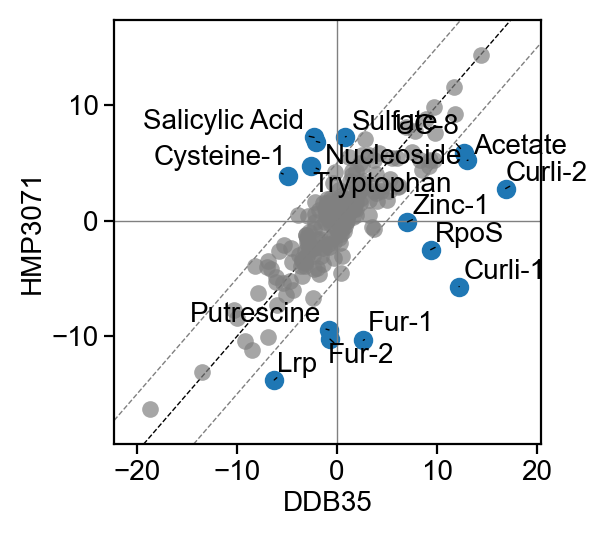

In [6]:
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=1, ncols=1)
ax1 = fig.add_subplot(spec[0,0])

ax, table_hmp_vs_ddb = plot_dima(
    combined_ica_data,
    sample1="Trp_scale-down:DDB35_control",
    sample2="Trp_scale-down:HMP3071_control",
    fdr=1,
    threshold=5,
    line45_margin=5,
    table=True,
    label="auto",
    ax=ax1
)

w=70/25.4
h=70/25.4
fig.set_size_inches(w=w,h=h)

plt.savefig("Strain_DiMAs.svg", dpi=900)

ax.set_xlabel("DDB35")
ax.set_ylabel("HMP3071")
table_hmp_vs_ddb

#### HMP3071 vs DDB35 (self centered)

,difference,pvalue,qvalue,0,1
Salicylic Acid,9.506433,0.000000e+00,0.000000e+00,1.350771e-15,9.506433
Nucleoside,8.921944,5.567417e-03,2.122670e-02,-6.071532e-17,8.921944
Cysteine-1,8.724876,5.071495e-03,1.998765e-02,-2.220446e-16,8.724876
Tryptophan,7.320091,3.964412e-01,5.273520e-01,4.857226e-16,7.320091
Sulfate,6.426434,1.123791e-04,5.378143e-04,-1.850372e-17,6.426434
UC-8,-6.827068,0.000000e+00,0.000000e+00,1.387779e-16,-6.827068
Zinc-1,-7.143766,3.305481e-01,5.273520e-01,-1.850372e-17,-7.143766
Lrp,-7.504835,1.754786e-01,3.674083e-01,1.711594e-16,-7.504835
Acetate,-7.796918,2.883760e-01,5.110644e-01,3.747003e-16,-7.796918
Putrescine,-8.651705,0.000000e+00,0.000000e+00,1.572816e-16,-8.651705


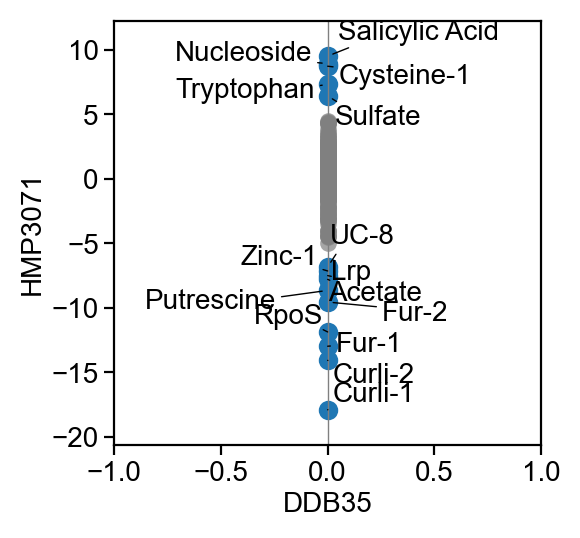

In [7]:
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=1, ncols=1)
ax1 = fig.add_subplot(spec[0,0])

ax, table_hmp_vs_ddb = plot_dima(
    trp_ica_data_self_centered,
    sample1="Trp_scale-down:DDB35_control",
    sample2="Trp_scale-down:HMP3071_control",
    fdr=1,
    threshold=5,
    line45_margin=5,
    table=True,
    label="auto",
    ax=ax1
)

w=70/25.4
h=70/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("Strain_DiMAs_self_centered.svg", dpi=900)

ax.set_xlabel("DDB35")
ax.set_ylabel("HMP3071")
table_hmp_vs_ddb

In [7]:
pd.concat([ica_data.imodulon_table.loc[table_hmp_vs_ddb.index],table_hmp_vs_ddb], axis=1).to_excel("strain_DEG_iM_table.xlsx")

### Scale-down vs control

#### DDB35

,difference,pvalue,qvalue,0,1,strain
Sulfate,3.915483,0.003097,0.622465,0.832694,4.748177,DDB35
Cysteine-1,3.289700,0.057398,0.898149,-4.869905,-1.580205,DDB35
ppGpp,2.355360,0.138032,0.898149,-10.282887,-7.927527,DDB35
Fnr-3,2.148703,0.145083,0.898149,3.242179,5.390881,DDB35
RpoS,-2.188992,0.143428,0.898149,9.359862,7.170870,DDB35
Fur-1,-2.472623,0.118498,0.898149,2.623116,0.150494,DDB35
Zinc-1,-2.836817,0.029374,0.898149,7.039403,4.202587,DDB35
FlhDC-2,-3.273264,0.055678,0.898149,4.224316,0.951052,DDB35
GadXW,-3.780696,0.018405,0.898149,0.413918,-3.366778,DDB35
Putrescine,-5.068752,0.006882,0.691611,-0.803615,-5.872367,DDB35


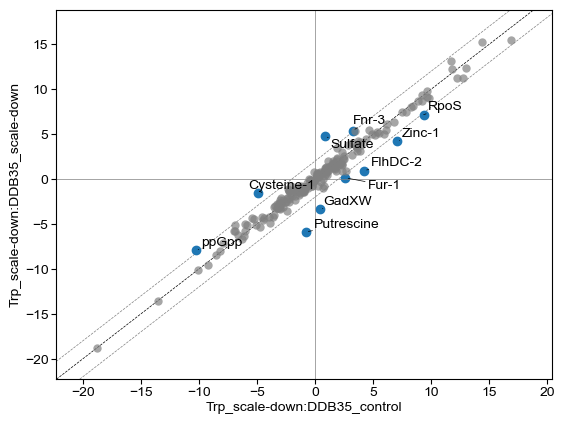

In [8]:
ax, table_1 = plot_dima(
    combined_ica_data,
    sample1="Trp_scale-down:DDB35_control",
    sample2="Trp_scale-down:DDB35_scale-down",
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table_1["strain"] = "DDB35"
table_1

,difference,pvalue,qvalue,strain
Sulfate,3.915483,0.003097,0.622465,DDB35
Cysteine-1,3.289700,0.057398,0.898149,DDB35
ppGpp,2.355360,0.138032,0.898149,DDB35
Fnr-3,2.148703,0.145083,0.898149,DDB35
SCFA,1.891226,0.034491,0.898149,DDB35
...,...,...,...,...
Fur-1,-2.472623,0.118498,0.898149,DDB35
Zinc-1,-2.836817,0.029374,0.898149,DDB35
FlhDC-2,-3.273264,0.055678,0.898149,DDB35
GadXW,-3.780696,0.018405,0.898149,DDB35


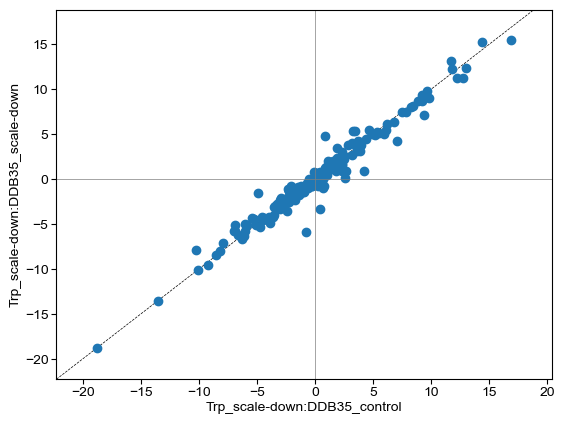

In [9]:
ax, ddb35_all_dimas = plot_dima(
    combined_ica_data,
    sample1="Trp_scale-down:DDB35_control",
    sample2="Trp_scale-down:DDB35_scale-down",
    fdr=1,
    threshold=0,
    line45_margin=0,
    table=True,
    label=False
)
ddb35_all_dimas["strain"] = "DDB35"
ddb35_all_dimas

#### HMP3071

,difference,pvalue,qvalue,0,1,strain
Pyruvate-1,5.135612,0.003057,0.401374,2.134649,7.270261,HMP3071
Arginine,3.478943,0.056118,0.415129,-5.366810,-1.887867,HMP3071
Leu/Val/Ile,2.918559,0.013452,0.413458,-2.638762,0.279797,HMP3071
Fnr-3,2.891534,0.098419,0.439607,5.675592,8.567126,HMP3071
ppGpp,2.644785,0.119566,0.445051,-7.739467,-5.094682,HMP3071
Methionine,2.249834,0.049411,0.415129,-2.621576,-0.371743,HMP3071
Propionate,2.220498,0.009128,0.401374,11.557558,13.778056,HMP3071
DhaR,2.212619,0.021582,0.413458,-4.906510,-2.693891,HMP3071
Cold Shock,2.080853,0.103124,0.441021,3.033303,5.114157,HMP3071
RpoE,-2.136211,0.018004,0.413458,5.396027,3.259816,HMP3071


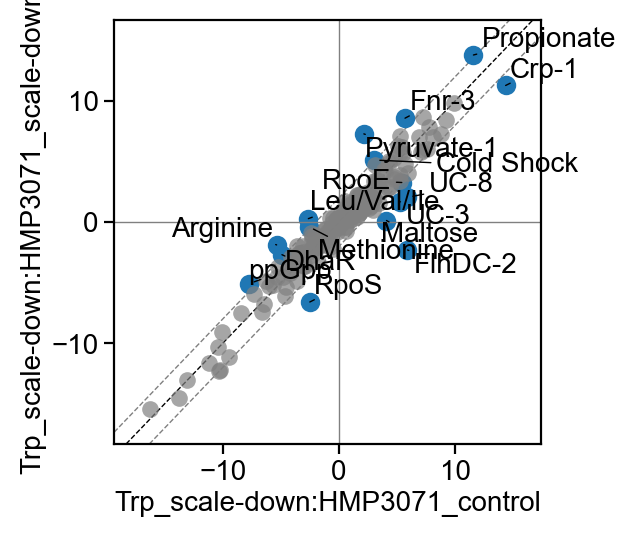

In [10]:
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=1, ncols=1)
ax1 = fig.add_subplot(spec[0,0])

ax, table_2 = plot_dima(
    combined_ica_data,
    sample1="Trp_scale-down:HMP3071_control",
    sample2="Trp_scale-down:HMP3071_scale-down",
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto",
    ax=ax1
)
table_2["strain"] = "HMP3071"

w=70/25.4
h=70/25.4
fig.set_size_inches(w=w,h=h)

plt.savefig("HMP_sd_DiMAs.svg", dpi=900)
table_2

In [11]:
pd.concat([ica_data.imodulon_table.loc[table_2.index],table_2], axis=1).to_excel("HMP_sd_DEG_iM_table.xlsx")

,difference,pvalue,qvalue,strain
Pyruvate-1,5.135612,0.003057,0.401374,HMP3071
Arginine,3.478943,0.056118,0.415129,HMP3071
Leu/Val/Ile,2.918559,0.013452,0.413458,HMP3071
Fnr-3,2.891534,0.098419,0.439607,HMP3071
ppGpp,2.644785,0.119566,0.445051,HMP3071
...,...,...,...,...
UC-3,-3.613650,0.008889,0.401374,HMP3071
UC-8,-3.851542,0.024684,0.413458,HMP3071
Maltose,-3.956440,0.020651,0.413458,HMP3071
RpoS,-4.086466,0.056576,0.415129,HMP3071


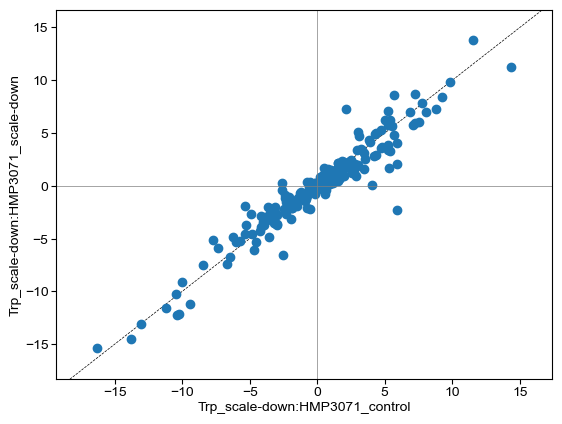

In [12]:
ax, HMP3071_all_dimas = plot_dima(
    combined_ica_data,
    sample1="Trp_scale-down:HMP3071_control",
    sample2="Trp_scale-down:HMP3071_scale-down",
    fdr=1,
    threshold=0,
    line45_margin=0,
    table=True,
    label=False
)
HMP3071_all_dimas["strain"] = "HMP3071"
HMP3071_all_dimas

## DiMA of DiMA

In [13]:
dima_of_dimas = pd.concat([HMP3071_all_dimas,ddb35_all_dimas]).pivot(values="difference", columns="strain")
thr = 2
dima_of_dimas["Diff"] = dima_of_dimas["HMP3071"]-dima_of_dimas["DDB35"]
dima_of_dimas_thr = dima_of_dimas[(dima_of_dimas["Diff"] > thr) | (dima_of_dimas["Diff"] < -thr)]
dima_of_dimas_thr = dima_of_dimas[((dima_of_dimas["HMP3071"] > 2) | (dima_of_dimas["HMP3071"] < -2)) | ((dima_of_dimas["DDB35"] > 2) | (dima_of_dimas["DDB35"] < -2))]

In [14]:
dima_of_dimas_thr

strain,DDB35,HMP3071,Diff
Arginine,1.090775,3.478943,2.388168
Cold Shock,0.871066,2.080853,1.209788
Crp-1,0.839360,-3.062813,-3.902173
Cysteine-1,3.289700,0.444557,-2.845143
DhaR,-0.179361,2.212619,2.391981
FlhDC-2,-3.273264,-8.190003,-4.916739
Fnr-3,2.148703,2.891534,0.742831
Fur-1,-2.472623,-1.915515,0.557108
GadXW,-3.780696,-0.784772,2.995924
Leu/Val/Ile,0.725829,2.918559,2.192730


NameError: name 'dima_od_dimas' is not defined

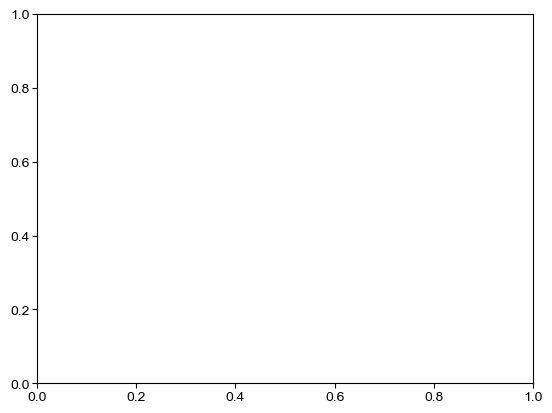

In [15]:
fig, ax = plt.subplots()

scatterplot(
    x=dima_od_dimas["DDB35"],
    y=dima_od_dimas["HMP3071"],
    line45=True,
    line45_margin=100,
    show_labels=False,
    ax=ax
)

scatterplot(
    x=dima_of_dimas_thr["DDB35"],
    y=dima_of_dimas_thr["HMP3071"],
    line45=True,
    line45_margin=0,
    show_labels=True,
    ax=ax
)

ax.set_xlabel("DDB35")
ax.set_ylabel("HMP3071")

#### All strains

In [16]:
control_samples = sample_table[sample_table["process_condition"] == "control"].index
sd_samples = sample_table[sample_table["process_condition"] == "scale-down"].index

,difference,pvalue,qvalue,0,1
ppGpp,2.500073,2.339241e-02,1.516734e-01,-9.011177,-6.511104
Fur-1,-2.194069,0.000000e+00,0.000000e+00,-3.864881,-6.058950
UC-8,-2.665218,3.774758e-15,1.083895e-13,9.300518,6.635300
Putrescine,-3.386747,0.000000e+00,0.000000e+00,-5.129468,-8.516214
FlhDC-2,-5.731633,0.000000e+00,0.000000e+00,5.053966,-0.677667


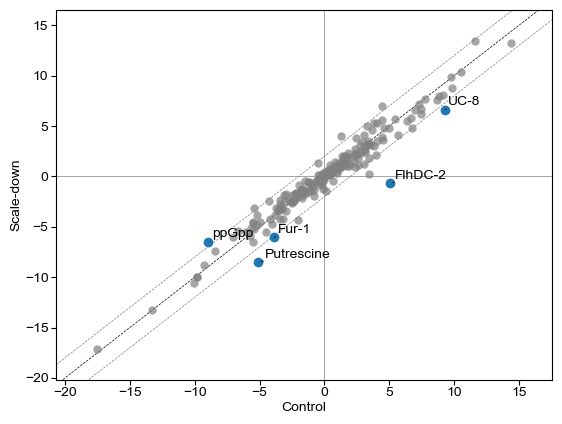

In [17]:
ax, table_all = plot_dima(
    trp_ica_data,
    sample1=control_samples,
    sample2=sd_samples,
    fdr=0.2,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)

ax.set_ylabel("Scale-down")
ax.set_xlabel("Control")

table_all

### Stimulons

In [ ]:
violet1 = mpl.colors.to_hex(mpl.cm.PRGn(0))
green1 = mpl.colors.to_hex(mpl.cm.PRGn(254))

violet2 = mpl.colors.to_hex(mpl.cm.PiYG(0))
green2 = mpl.colors.to_hex(mpl.cm.PiYG(254))

blue1 = mpl.colors.to_hex(mpl.cm.bwr(0))
red1 = mpl.colors.to_hex(mpl.cm.bwr(254))

blue2 = mpl.colors.to_hex(mpl.cm.coolwarm(0))
red2 = mpl.colors.to_hex(mpl.cm.coolwarm(254))

cmap1 = mpl.colors.LinearSegmentedColormap.from_list(
    name="custom", 
    colors=[(0,blue2), (0.25,"white"), (0.75,"white"), (1,red2)],
    N=20
)

cmap2 = mpl.colors.LinearSegmentedColormap.from_list(
    name="custom", 
    colors=[(0,green2), (0.25,"white"), (0.75,"white"), (1,violet2)],
    N=20
)

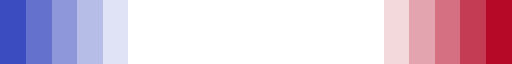

In [15]:
cmap1

#### iModulon correlation (using scale-down iMs)

In [16]:
iMs = table_combined.index.unique()
sample_df = sample_table
samples = sample_df.index
A_filtered = trp_ica_data.A.loc[iMs][samples]

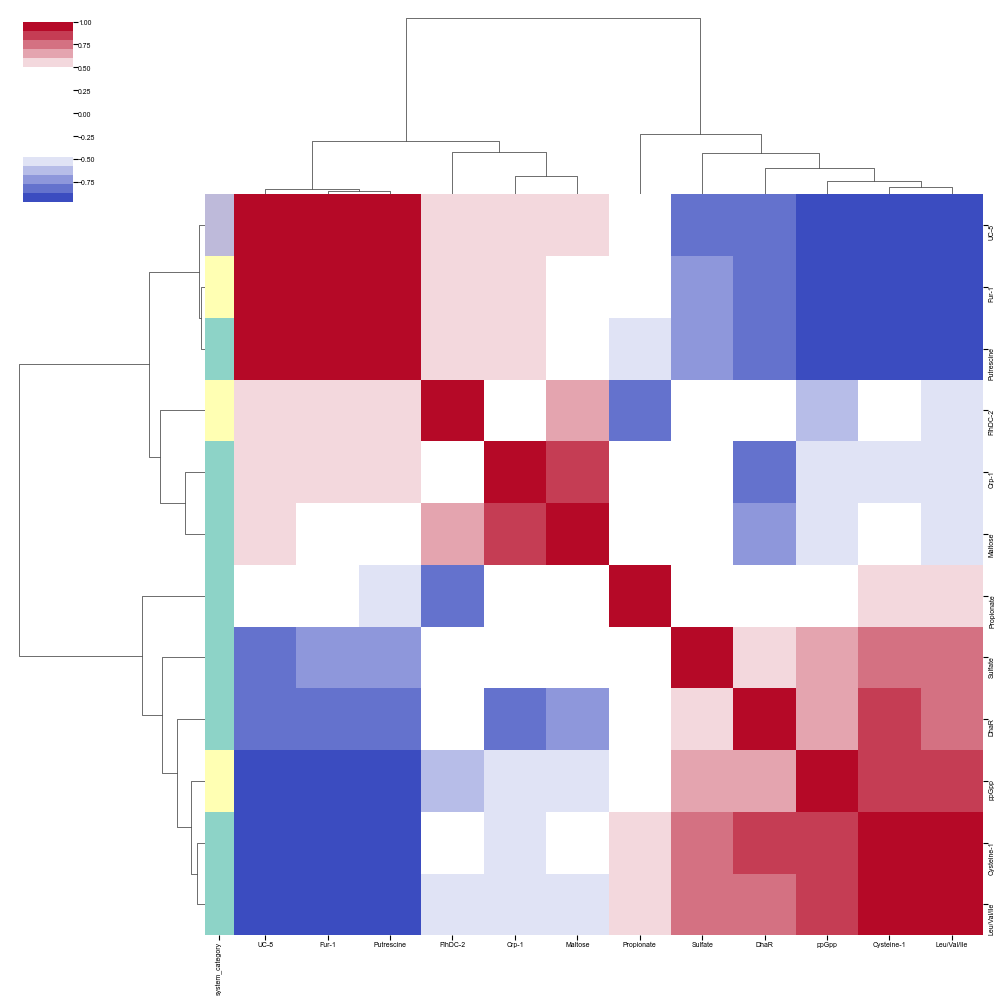

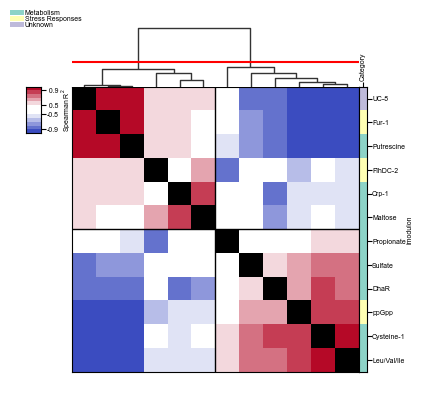

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# formatting
plt.rcParams['font.size'] = 5
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5
# plt.rcParams['ylabel.pad']= 0

A_corr = A_filtered.T.corr(method="spearman")
clustered_df = A_corr

### Color definition for the iM categories
cmap = cm.get_cmap(name="Set3")
category = trp_ica_data.imodulon_table.loc[list(A_corr.index)]["system_category"]

row_palette = dict(zip(category.unique(), [cmap(x) for x in range(0,len(category.unique()))]))
row_colors = category.map(row_palette)


g = sns.clustermap(
    data = clustered_df,
    cmap=cmap1,
    row_colors=row_colors
)

row_labels = list(clustered_df.iloc[g.dendrogram_row.reordered_ind].index)
col_labels = list(clustered_df.T.iloc[g.dendrogram_col.reordered_ind].index)

heatmap_df = clustered_df.loc[row_labels].T
heatmap_df = heatmap_df.loc[col_labels].T

fig = plt.figure(figsize=(53/10,49/10))
spec = fig.add_gridspec(nrows=49, ncols=53)

frame_ax = fig.add_subplot(spec[:,:])
main_ax = fig.add_subplot(spec[10:47,8:45])
dn_col_ax = fig.add_subplot(spec[2:10,8:45])
iM_cat_ax = fig.add_subplot(spec[10:47,45])
cbar_ax = fig.add_subplot(spec[10:16,2:4])

plt.subplots_adjust(hspace=0, wspace=0)

# ### Plot Heatmap
# ################

# sns.heatmap(heatmap_df, ax=main_ax, cmap=cmap1, linewidths=0,cbar_ax=cbar_ax,cbar=True)
sns.heatmap(heatmap_df, ax=main_ax, cmap=cmap1, linewidths=0,cbar=False)

main_ax.yaxis.set_label_position("right")
main_ax.yaxis.tick_right()
main_ax.set_yticklabels([])
main_ax.set_xticklabels([])
main_ax.set_yticks([])
main_ax.set_xticks([])

main_ax.spines[["top","bottom","right","left"]].set_visible(True)

for idx in range(0,len(clustered_df)):
    r = plt.Rectangle(width=1,height=1,xy=(idx,idx),facecolor="k")
    main_ax.add_patch(r)

### Plot Categories
###################   

iM_cat_ax.yaxis.set_label_position("right")
iM_cat_ax.yaxis.tick_right()
iM_cat_ax.set_ylabel("imodulon")

iM_cat_ax.xaxis.set_label_position("top")
iM_cat_ax.xaxis.tick_top()

iM_cat_ax.set_xticks([0.5])
iM_cat_ax.set_xticklabels(["Category"], rotation = 90)
iM_cat_ax.set_yticks(np.arange(0.5,len(row_labels),1))
iM_cat_ax.set_yticklabels(row_labels)

iM_cat_ax.set_ylim(0,len(row_labels))
iM_cat_ax.set_xlim(0,1)

row_color_list = [g.row_colors[i] for i in g.dendrogram_row.reordered_ind]


for i in range(0, len(row_color_list)):
    rectangle = plt.Rectangle((0,i), 1, 1, fc=row_color_list[i])
    iM_cat_ax.add_patch(rectangle)
    # iM_cat_ax.vlines(x=i,ymin=0,ymax=1, colors="k",linewidth=0.7)
    # iM_cat_ax.vlines(x=len(row_color_list),ymin=0,ymax=1, colors="white",linewidth=0.7)
    # iM_cat_ax.hlines(y=0,xmin=0,xmax=len(row_color_list), colors="white",linewidth=0.7)
    # iM_cat_ax.hlines(y=1,xmin=0,xmax=len(row_color_list), colors="white",linewidth=0.7)
    
iM_cat_ax.invert_yaxis()
    
    
cat_df = category.drop_duplicates().reset_index()
cat_df.sort_values("system_category", inplace=True)
    
legend_labels = list(cat_df["system_category"])
    
legend_elements = []
for i, cat in cat_df.itertuples(index=False):
    legend_elements.append((Patch(facecolor=row_colors.loc[i], edgecolor=None)))
    
frame_ax.legend(
    legend_elements, 
    legend_labels, 
    fancybox=False,
    bbox_to_anchor=(0,1),
    loc='upper left',
    ncol=1, 
    # edgecolor='black',
    columnspacing=0.1,
    handletextpad=0.1,
    labelspacing = 0,
    # title='Category:',
    framealpha=0,
    borderpad=0,
    borderaxespad=0
)

### Plot Colorbar
#################

norm = mpl.colors.Normalize(vmin=0, vmax=1)

r = plt.Rectangle(xy=(0,0),width=1,height=0.08, facecolor=cmap1(norm(0.025)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.08),width=1,height=0.08, facecolor=cmap1(norm(0.075)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.16),width=1,height=0.08, facecolor=cmap1(norm(0.125)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.24),width=1,height=0.08, facecolor=cmap1(norm(0.175)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.32),width=1,height=0.08, facecolor=cmap1(norm(0.225)))
cbar_ax.add_patch(r)


r = plt.Rectangle(xy=(0,0.6),width=1,height=0.08, facecolor=cmap1(norm(0.775)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.68),width=1,height=0.08, facecolor=cmap1(norm(0.825)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.76),width=1,height=0.08, facecolor=cmap1(norm(0.875)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.84),width=1,height=0.08, facecolor=cmap1(norm(0.925)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.92),width=1,height=0.08, facecolor=cmap1(norm(0.975)))
cbar_ax.add_patch(r)


cbar_ax.yaxis.set_label_position("right")
cbar_ax.yaxis.tick_right()
cbar_ax.set_yticks([0.08,0.4,0.6,0.92])
cbar_ax.set_yticklabels(["-0.9","-0.5"," 0.5"," 0.9"])
cbar_ax.set_ylabel("Spearman R$^{2}$")
cbar_ax.set_xticks([])


# ### Plot Dendrogram
# ###################

g.dendrogram_col.plot(ax=dn_col_ax,tree_kws={"linewidth":1})

thr = 2

d = dendrogram(
    Z = g.dendrogram_col.linkage,
    color_threshold = thr,
    no_plot=True
);

x0 = dn_col_ax.get_xlim()[0]
x1 = dn_col_ax.get_xlim()[1]

dn_col_ax.hlines(y=thr,xmin=x0,xmax=x1,colors="red",linestyles="-")

dn_col_ax.spines[["top","bottom","right","left"]].set_visible(False)
dn_col_ax.set_xticks([])
dn_col_ax.set_yticks([]);

# # ### Draw cluster lines into the clustermap based on dengrogram threshold
# # ########################################################################

leaves_color_list = list(map(str, d["leaves_color_list"]))
counter = 1
line_list = []

for idx in range(0,len(leaves_color_list)-1):

    if leaves_color_list[idx] != leaves_color_list[counter]:
        
        line_list.append(counter)
        
    counter = counter+1

y0 = main_ax.get_ylim()[0]
y1 = main_ax.get_ylim()[1]
x0 = main_ax.get_xlim()[0]
x1 = main_ax.get_xlim()[1]

for line_id in line_list:

    main_ax.vlines(x=line_id, ymin = y0, ymax= y1, colors="k", linewidths=1)
    main_ax.hlines(y=line_id, xmin = x0, xmax= x1, colors="k", linewidths=1)
    
frame_ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
frame_ax.set_yticks([])
frame_ax.set_xticks([]);

# plt.savefig("cluster_test.svg", dpi=900)

#### Sample - iModulon clusters (using strain DiMAs)

In [18]:
iMs = table_hmp_vs_ddb.index.unique()
sample_df = sample_table
samples = sample_df.index
A_filtered = trp_ica_data.A.loc[iMs][samples]

In [19]:
### Color definition for the iM categories
cmap = cm.get_cmap(name="Set3")
category = trp_ica_data.imodulon_table.loc[list(A_filtered.index)]["system_category"]

row_palette = dict(zip(category.unique(), [cmap(x) for x in range(0,len(category.unique()))]))
row_colors = category.map(row_palette)

### Color definition for the strains
cmap = cm.get_cmap(name="tab20")
condition = sample_df["condition"].sort_values()

col_palette = dict(zip(condition.unique(), [cmap(x) for x in range(0,len(condition.unique()))]))
col_colors = condition.map(col_palette)

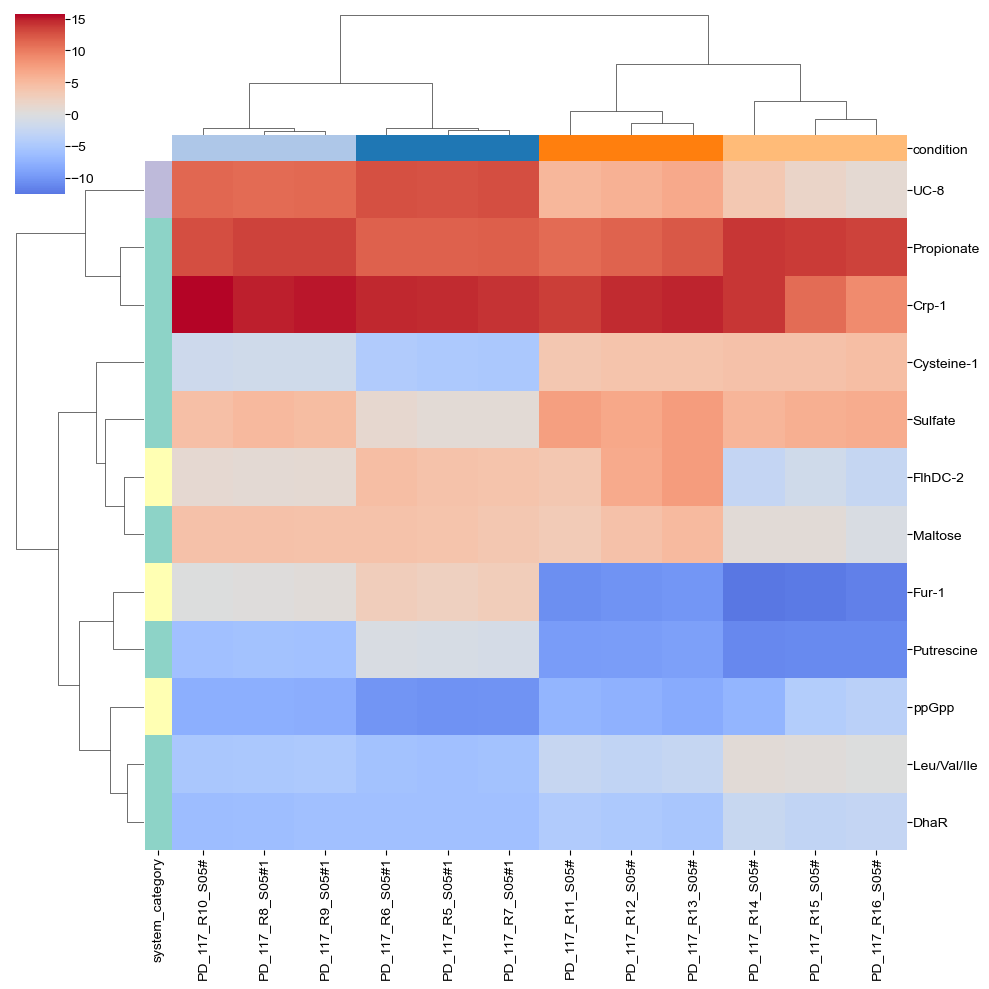

In [25]:
# formatting
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

g = sns.clustermap(
    data = A_filtered,
    # figsize=(2, 3.4),
    dendrogram_ratio=0.15,
    cmap="coolwarm",
    center=0,
    # z_score=0,
    col_colors=col_colors,
    row_colors=row_colors,
    # metric="correlation"
)
# plt.savefig("clustermap_fig4.svg", dpi=900)

#### Sample - iModulon clusters (using scale-down DiMAs)

In [21]:
iMs = table_combined.index.unique()
sample_df = sample_table
samples = sample_df.index
A_filtered = trp_ica_data.A.loc[iMs][samples]

In [22]:
### Color definition for the iM categories
cmap = cm.get_cmap(name="Set3")
category = trp_ica_data.imodulon_table.loc[list(A_filtered.index)]["system_category"]

row_palette = dict(zip(category.unique(), [cmap(x) for x in range(0,len(category.unique()))]))
row_colors = category.map(row_palette)

### Color definition for the strains
cmap = cm.get_cmap(name="tab20")
condition = sample_df["condition"].sort_values()

col_palette = dict(zip(condition.unique(), [cmap(x) for x in range(0,len(condition.unique()))]))
col_colors = condition.map(col_palette)

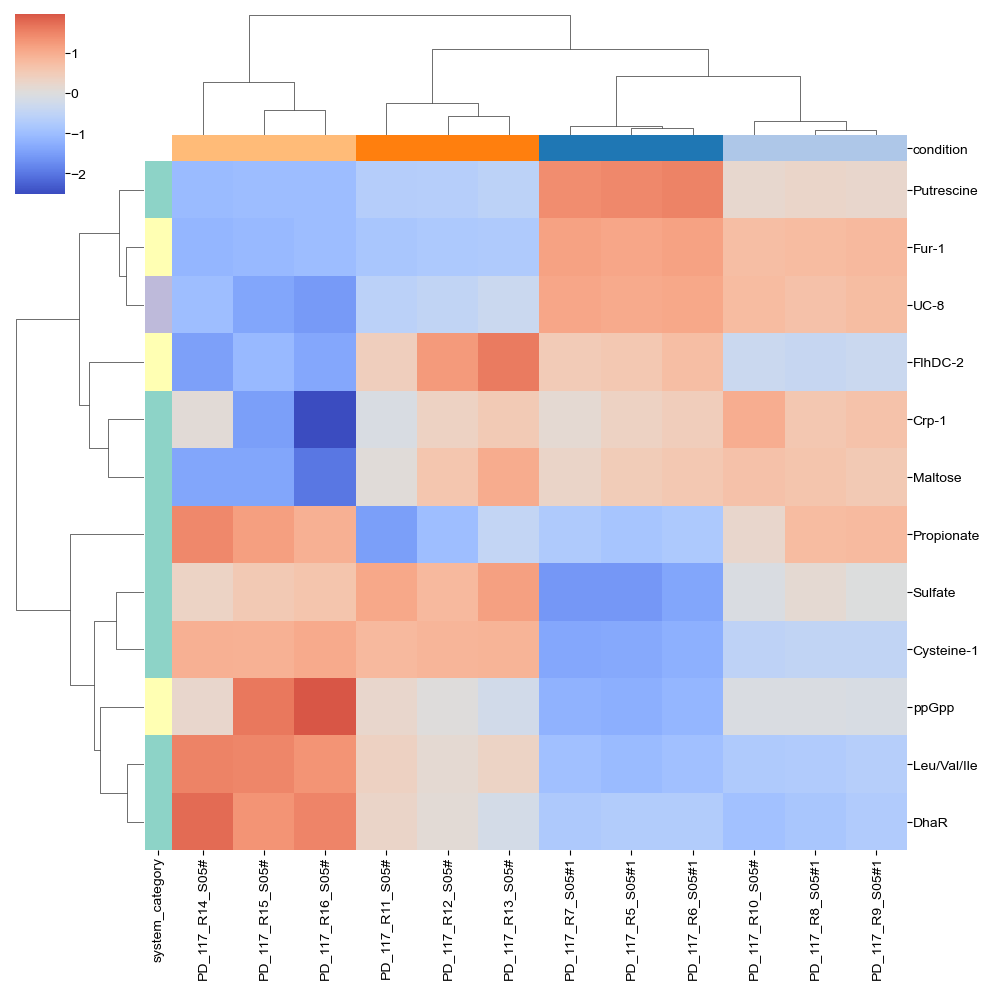

In [26]:
# formatting
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

g = sns.clustermap(
    data = A_filtered,
    # figsize=(2, 3.4),
    dendrogram_ratio=0.15,
    cmap="coolwarm",
    center=0,
    z_score=0,
    col_colors=col_colors,
    row_colors=row_colors,
    # metric="correlation"
)
# plt.savefig("clustermap_fig4.svg", dpi=900)

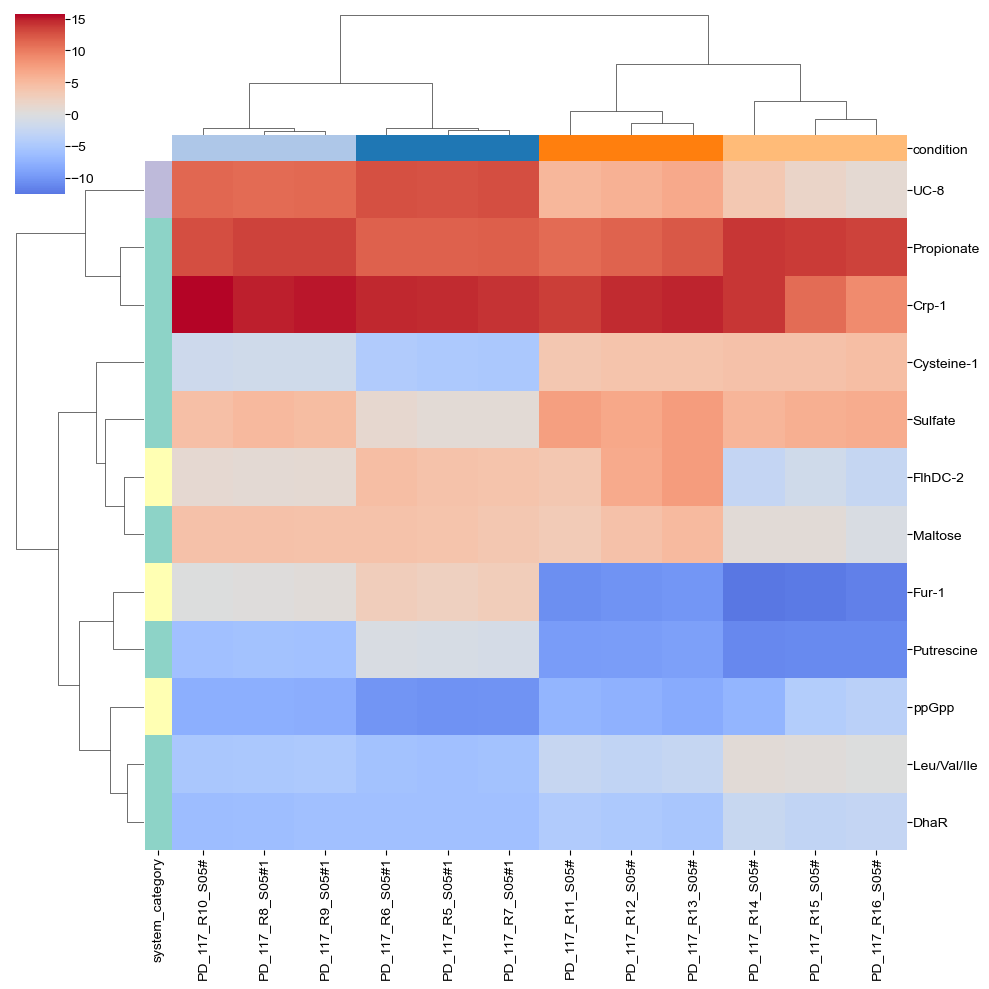

In [27]:
# formatting
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

g = sns.clustermap(
    data = A_filtered,
    # figsize=(2, 3.4),
    dendrogram_ratio=0.15,
    cmap="coolwarm",
    center=0,
    # z_score=0,
    col_colors=col_colors,
    row_colors=row_colors,
    # metric="correlation"
)
# plt.savefig("clustermap_fig4.svg", dpi=900)

#### iModulon correlation (using strain and scale-down DiMAs)

In [44]:
iMs = pd.concat([table_combined,table_hmp_vs_ddb]).index.unique()
sample_df = sample_table
samples = sample_df.index
A_filtered = trp_ica_data.A.loc[iMs][samples]

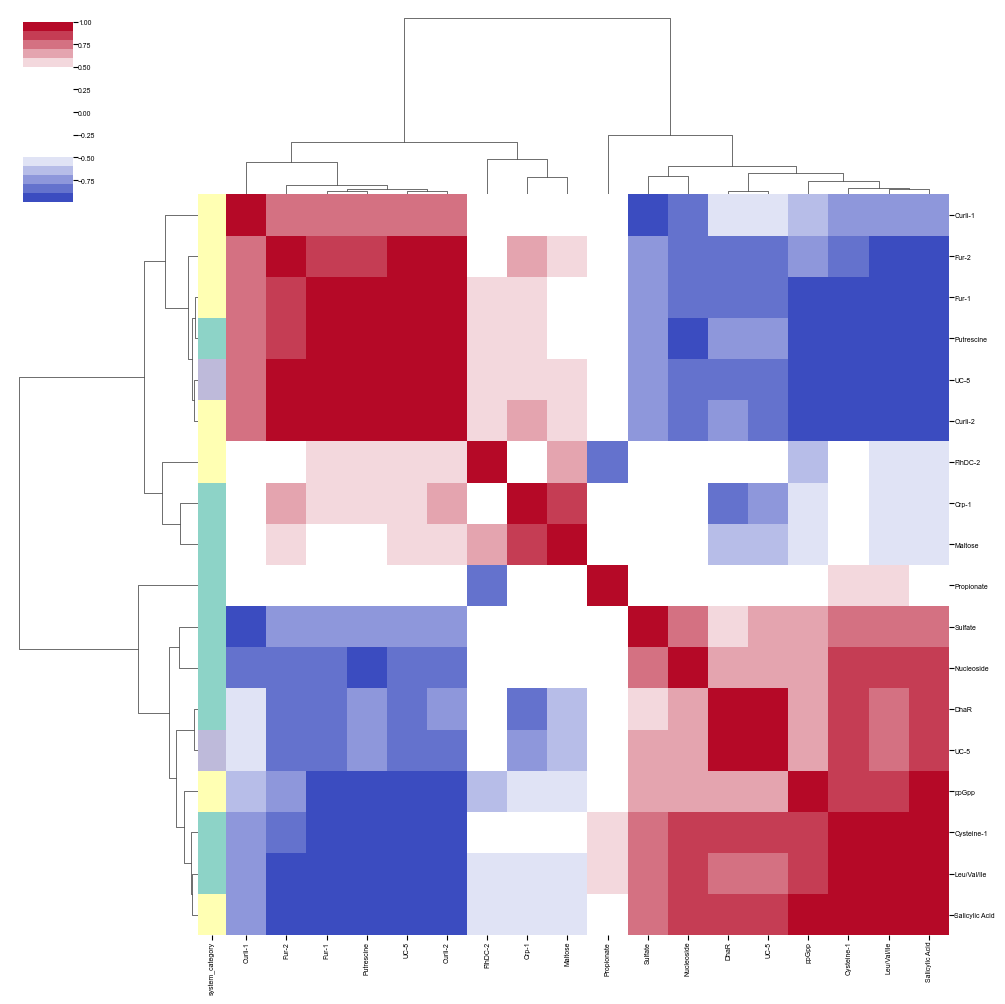

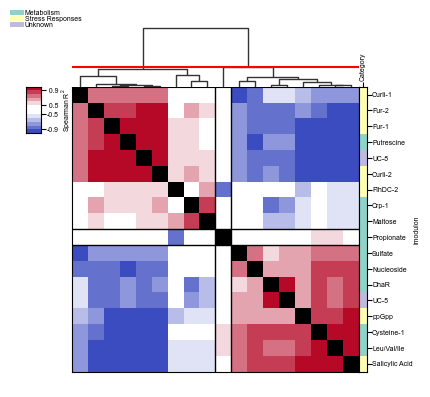

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# formatting
plt.rcParams['font.size'] = 5
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5
# plt.rcParams['ylabel.pad']= 0

A_corr = A_filtered.T.corr(method="spearman")
clustered_df = A_corr

### Color definition for the iM categories
cmap = cm.get_cmap(name="Set3")
category = trp_ica_data.imodulon_table.loc[list(A_corr.index)]["system_category"]

row_palette = dict(zip(category.unique(), [cmap(x) for x in range(0,len(category.unique()))]))
row_colors = category.map(row_palette)


g = sns.clustermap(
    data = clustered_df,
    cmap=cmap1,
    row_colors=row_colors
)

row_labels = list(clustered_df.iloc[g.dendrogram_row.reordered_ind].index)
col_labels = list(clustered_df.T.iloc[g.dendrogram_col.reordered_ind].index)

heatmap_df = clustered_df.loc[row_labels].T
heatmap_df = heatmap_df.loc[col_labels].T

fig = plt.figure(figsize=(53/10,49/10))
spec = fig.add_gridspec(nrows=49, ncols=53)

frame_ax = fig.add_subplot(spec[:,:])
main_ax = fig.add_subplot(spec[10:47,8:45])
dn_col_ax = fig.add_subplot(spec[2:10,8:45])
iM_cat_ax = fig.add_subplot(spec[10:47,45])
cbar_ax = fig.add_subplot(spec[10:16,2:4])

plt.subplots_adjust(hspace=0, wspace=0)

# ### Plot Heatmap
# ################

# sns.heatmap(heatmap_df, ax=main_ax, cmap=cmap1, linewidths=0,cbar_ax=cbar_ax,cbar=True)
sns.heatmap(heatmap_df, ax=main_ax, cmap=cmap1, linewidths=0,cbar=False)

main_ax.yaxis.set_label_position("right")
main_ax.yaxis.tick_right()
main_ax.set_yticklabels([])
main_ax.set_xticklabels([])
main_ax.set_yticks([])
main_ax.set_xticks([])

main_ax.spines[["top","bottom","right","left"]].set_visible(True)

for idx in range(0,len(clustered_df)):
    r = plt.Rectangle(width=1,height=1,xy=(idx,idx),facecolor="k")
    main_ax.add_patch(r)

### Plot Categories
###################   

iM_cat_ax.yaxis.set_label_position("right")
iM_cat_ax.yaxis.tick_right()
iM_cat_ax.set_ylabel("imodulon")

iM_cat_ax.xaxis.set_label_position("top")
iM_cat_ax.xaxis.tick_top()

iM_cat_ax.set_xticks([0.5])
iM_cat_ax.set_xticklabels(["Category"], rotation = 90)
iM_cat_ax.set_yticks(np.arange(0.5,len(row_labels),1))
iM_cat_ax.set_yticklabels(row_labels)

iM_cat_ax.set_ylim(0,len(row_labels))
iM_cat_ax.set_xlim(0,1)

row_color_list = [g.row_colors[i] for i in g.dendrogram_row.reordered_ind]


for i in range(0, len(row_color_list)):
    rectangle = plt.Rectangle((0,i), 1, 1, fc=row_color_list[i])
    iM_cat_ax.add_patch(rectangle)
    # iM_cat_ax.vlines(x=i,ymin=0,ymax=1, colors="k",linewidth=0.7)
    # iM_cat_ax.vlines(x=len(row_color_list),ymin=0,ymax=1, colors="white",linewidth=0.7)
    # iM_cat_ax.hlines(y=0,xmin=0,xmax=len(row_color_list), colors="white",linewidth=0.7)
    # iM_cat_ax.hlines(y=1,xmin=0,xmax=len(row_color_list), colors="white",linewidth=0.7)
    
iM_cat_ax.invert_yaxis()
    
    
cat_df = category.drop_duplicates().reset_index()
cat_df.sort_values("system_category", inplace=True)
    
legend_labels = list(cat_df["system_category"])
    
legend_elements = []
for i, cat in cat_df.itertuples(index=False):
    legend_elements.append((Patch(facecolor=row_colors.loc[i], edgecolor=None)))
    
frame_ax.legend(
    legend_elements, 
    legend_labels, 
    fancybox=False,
    bbox_to_anchor=(0,1),
    loc='upper left',
    ncol=1, 
    # edgecolor='black',
    columnspacing=0.1,
    handletextpad=0.1,
    labelspacing = 0,
    # title='Category:',
    framealpha=0,
    borderpad=0,
    borderaxespad=0
)

### Plot Colorbar
#################

norm = mpl.colors.Normalize(vmin=0, vmax=1)

r = plt.Rectangle(xy=(0,0),width=1,height=0.08, facecolor=cmap1(norm(0.025)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.08),width=1,height=0.08, facecolor=cmap1(norm(0.075)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.16),width=1,height=0.08, facecolor=cmap1(norm(0.125)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.24),width=1,height=0.08, facecolor=cmap1(norm(0.175)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.32),width=1,height=0.08, facecolor=cmap1(norm(0.225)))
cbar_ax.add_patch(r)


r = plt.Rectangle(xy=(0,0.6),width=1,height=0.08, facecolor=cmap1(norm(0.775)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.68),width=1,height=0.08, facecolor=cmap1(norm(0.825)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.76),width=1,height=0.08, facecolor=cmap1(norm(0.875)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.84),width=1,height=0.08, facecolor=cmap1(norm(0.925)))
cbar_ax.add_patch(r)

r = plt.Rectangle(xy=(0,0.92),width=1,height=0.08, facecolor=cmap1(norm(0.975)))
cbar_ax.add_patch(r)


cbar_ax.yaxis.set_label_position("right")
cbar_ax.yaxis.tick_right()
cbar_ax.set_yticks([0.08,0.4,0.6,0.92])
cbar_ax.set_yticklabels(["-0.9","-0.5"," 0.5"," 0.9"])
cbar_ax.set_ylabel("Spearman R$^{2}$")
cbar_ax.set_xticks([])


# ### Plot Dendrogram
# ###################

g.dendrogram_col.plot(ax=dn_col_ax,tree_kws={"linewidth":1})

thr = 2

d = dendrogram(
    Z = g.dendrogram_col.linkage,
    color_threshold = thr,
    no_plot=True
);

x0 = dn_col_ax.get_xlim()[0]
x1 = dn_col_ax.get_xlim()[1]

dn_col_ax.hlines(y=thr,xmin=x0,xmax=x1,colors="red",linestyles="-")

dn_col_ax.spines[["top","bottom","right","left"]].set_visible(False)
dn_col_ax.set_xticks([])
dn_col_ax.set_yticks([]);

# # ### Draw cluster lines into the clustermap based on dengrogram threshold
# # ########################################################################

leaves_color_list = list(map(str, d["leaves_color_list"]))
counter = 1
line_list = []

for idx in range(0,len(leaves_color_list)-1):

    if leaves_color_list[idx] != leaves_color_list[counter]:
        
        line_list.append(counter)
        
    counter = counter+1

y0 = main_ax.get_ylim()[0]
y1 = main_ax.get_ylim()[1]
x0 = main_ax.get_xlim()[0]
x1 = main_ax.get_xlim()[1]

for line_id in line_list:

    main_ax.vlines(x=line_id, ymin = y0, ymax= y1, colors="k", linewidths=1)
    main_ax.hlines(y=line_id, xmin = x0, xmax= x1, colors="k", linewidths=1)
    
frame_ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
frame_ax.set_yticks([])
frame_ax.set_xticks([]);

# plt.savefig("cluster_test.svg", dpi=900)

#### Sample - iModulon clusters (using strain and scale-down DiMAs)

In [186]:
iMs = pd.concat([table_combined,table_hmp_vs_ddb]).index.unique()
sample_df = sample_table
samples = sample_df.index
A_filtered = trp_ica_data.A.loc[iMs][samples]

In [187]:
### Color definition for the iM categories
cmap = cm.get_cmap(name="Set3")
category = trp_ica_data.imodulon_table.loc[list(A_filtered.index)]["system_category"]

row_palette = dict(zip(category.unique(), [cmap(x) for x in range(0,len(category.unique()))]))
row_colors = category.map(row_palette)

### Color definition for the strains
cmap = cm.get_cmap(name="tab20")
condition = sample_df["condition"].sort_values()

col_palette = dict(zip(condition.unique(), [cmap(x) for x in range(0,len(condition.unique()))]))
col_colors = condition.map(col_palette)

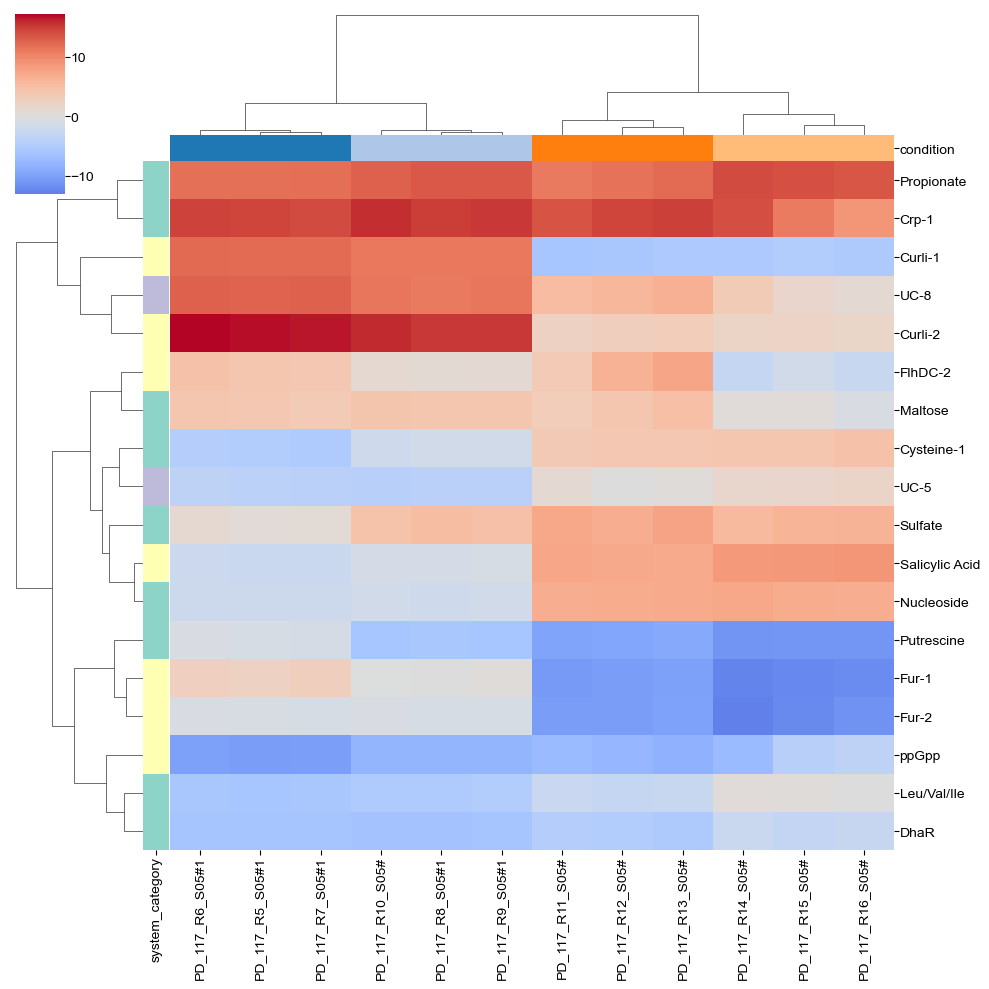

In [188]:
# formatting
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

g = sns.clustermap(
    data = A_filtered,
    # figsize=(2, 3.4),
    dendrogram_ratio=0.15,
    cmap="coolwarm",
    center=0,
    # z_score=0,
    col_colors=col_colors,
    row_colors=row_colors,
    # metric="correlation"
)
# plt.savefig("clustermap_fig4.svg", dpi=900)

# DEG analysis

## Load DEGs

In [675]:
def replace_p_value_zeros(deg_df):
    padj_values = list(deg_df.padj)
    new_padj_values = []
    min_replacement = deg_df[deg_df.padj != 0].padj.min() * 0.1
    
    for val in padj_values:
        if val == 0:
            new_padj_values.append(min_replacement)
        elif val == np.nan:
            new_padj_values.append(np.nan)
        else:
            new_padj_values.append(val)
            
    deg_df.padj = new_padj_values
    
    return deg_df

In [676]:
strain_deg_df = pd.read_csv("../data/RNAseq_data/DESeq_res_HMP3071_vs_DDB35.csv", index_col=0)
sd_deg_ddb35_df = pd.read_csv("../data/RNAseq_data/DESeq_res_DDB35_sd_vs_ctrl.csv", index_col=0)
sd_deg_hmp3071_df = pd.read_csv("../data/RNAseq_data/DESeq_res_HMP3071_sd_vs_ctrl.csv", index_col=0)

strain_deg_df = replace_p_value_zeros(strain_deg_df)
sd_deg_ddb35_df = replace_p_value_zeros(sd_deg_ddb35_df)
sd_deg_hmp3071_df = replace_p_value_zeros(sd_deg_hmp3071_df)

## Calculate enrichments

### Define Function

In [40]:
def calculate_DEG_enrichments(deg_dataframe, deg_fold_change_threshold=2.0, fdr=10e-5):
    
    regulator_enrichment_df = pd.DataFrame()
    cog_enrichment_df = pd.DataFrame()
    deg_results_df = pd.DataFrame()
    
    deg_df = deg_dataframe.copy()
    
        
    # select insignificant genes
    ############################
    ns_df = deg_df[((deg_df["padj"] > fdr) | ((deg_df["log2FoldChange"] > -np.log2(deg_fold_change_threshold)) & (deg_df["log2FoldChange"] < np.log2(deg_fold_change_threshold))))]
        
    # select up genes
    #################
    up_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] >= np.log2(deg_fold_change_threshold)))]
    up_df["direction"] = "up"
        
    # select down genes
    ###################
    down_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] <= -np.log2(deg_fold_change_threshold)))]
    down_df["direction"] = "down"
    
    deg_results_df = pd.concat([deg_results_df, pd.concat([down_df, up_df])])
        
    # Calucalte enrichments
    #######################
          
    ### COGs ############################
    #####################################

    cog_list = list(ica_data.gene_table.COG.unique())

    for cog in cog_list:

        all_genes = list(ica_data.gene_table.index.unique())
        gene_set_down_temp = list(down_df.index)
        gene_set_down = []
        for gene_id in gene_set_down_temp:
            if gene_id in all_genes:
                gene_set_down.append(gene_id)

        gene_set_up_temp = list(up_df.index)
        gene_set_up = []
        for gene_id in gene_set_up_temp:
            if gene_id in all_genes:
                gene_set_up.append(gene_id)

        target_genes = list(ica_data.gene_table[ica_data.gene_table.COG == cog].index)

        for direction in ["up", "down"]:

            gene_set = vars()["gene_set_" + direction]

            df1 = compute_enrichment(gene_set, target_genes, all_genes)

            df = pd.DataFrame()
            df = pd.concat([df,df1]).T
            df["COG"] = cog
            df["Direction"] = direction
            df["All_genes"] = len(all_genes)

            cog_enrichment_df = pd.concat([cog_enrichment_df,df])
            
    ### TRN #############################
    #####################################
    
    for direction in ["up", "down"]:
        
        gene_set = vars()["gene_set_" + direction]
        
        df1 = compute_trn_enrichment(gene_set, all_genes, ica_data.trn)
        df1["Direction"] = direction
        
        regulator_enrichment_df = pd.concat([regulator_enrichment_df,df1])
        

    cog_enrichment_df.index = range(0,len(cog_enrichment_df))
    cog_enrichment_df["Fold_enrichment"] = (cog_enrichment_df["TP"]/cog_enrichment_df["gene_set_size"])/(cog_enrichment_df["target_set_size"]/cog_enrichment_df["All_genes"])
    
    return regulator_enrichment_df, cog_enrichment_df, deg_results_df

In [51]:
# a, b, c = calculate_DEG_enrichments(sd_deg_hmp3071_df, deg_fold_change_threshold=1.5, fdr=0.05)
# a.to_excel("sd_degs_hmp3071_TRN_enrichment.xlsx")
# b.to_excel("sd_degs_hmp3071_COG_enrichment.xlsx")
# c.to_excel("sd_degs_hmp3071_DEG_results.xlsx")

# a, b, c = calculate_DEG_enrichments(sd_deg_ddb35_df, deg_fold_change_threshold=1.5, fdr=0.05)
# a.to_excel("sd_degs_ddb35_TRN_enrichment.xlsx")
# b.to_excel("sd_degs_ddb35_COG_enrichment.xlsx")
# c.to_excel("sd_degs_ddb35_DEG_results.xlsx")

# a, b, c = calculate_DEG_enrichments(strain_deg_df, deg_fold_change_threshold=2.0, fdr=0.05)
# a.to_excel("strain_degs_TRN_enrichment.xlsx")
# b.to_excel("strain_degs_COG_enrichment.xlsx")
# c.to_excel("strain_degs_DEG_results.xlsx")

## Plot Volcano

### HMP3071 SD DEGs

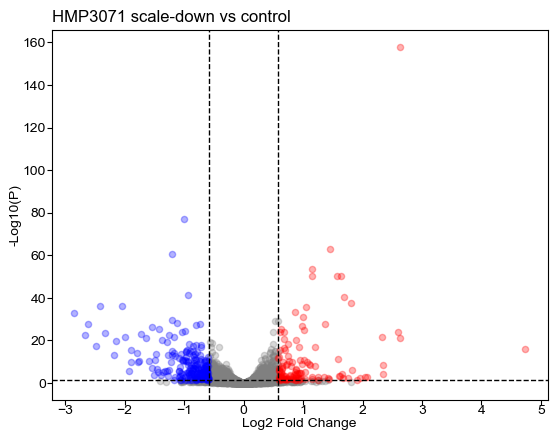

In [34]:
deg_df = sd_deg_hmp3071_df
fdr = 0.05
deg_fold_change_threshold = 1.5

fig, ax = plt.subplots()

# select insignificant genes
############################
ns_df = deg_df[((deg_df["padj"] > fdr) | ((deg_df["log2FoldChange"] > -np.log2(deg_fold_change_threshold)) & (deg_df["log2FoldChange"] < np.log2(deg_fold_change_threshold))))]
        
# select up genes
#################
up_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] >= np.log2(deg_fold_change_threshold)))]
up_df["direction"] = "up"
        
# select down genes
###################
down_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] <= -np.log2(deg_fold_change_threshold)))]
down_df["direction"] = "down"

# plot data
###########

# not significant
ax.scatter(ns_df['log2FoldChange'],-np.log10(ns_df['padj']),color='grey',alpha=0.3,label='NS',s=20)
# up genes
ax.scatter(up_df['log2FoldChange'],-np.log10(up_df['padj']),color='red',alpha=0.3,label='up',s=20)
# down genes
ax.scatter(down_df['log2FoldChange'],-np.log10(down_df['padj']),color='blue',alpha=0.3,label='down',s=20)

# customize axis label, titles, ticklabels

# Support lines
###############

# ax.set_ylim(-5,180)
# ax.set_xlim(-6.5,6.5)

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

ax.hlines(y=-np.log10(fdr), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],colors='k',linestyles="--",linewidth=1)
ax.vlines(x=np.log2(deg_fold_change_threshold),  ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=1)
ax.vlines(x=-np.log2(deg_fold_change_threshold), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=1)

# Title
#######

ax.set_title("HMP3071 scale-down vs control", loc="left")

# Ax titles
###########

ax.set_xlabel("Log2 Fold Change")
ax.set_ylabel("-Log10(P)");

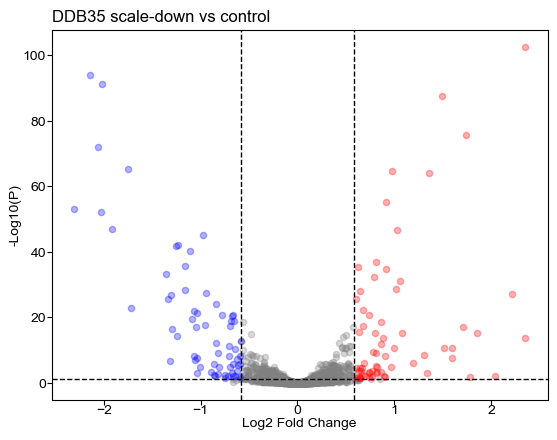

In [35]:
deg_df = sd_deg_ddb35_df
fdr = 0.05
deg_fold_change_threshold = 1.5

fig, ax = plt.subplots()

# select insignificant genes
############################
ns_df = deg_df[((deg_df["padj"] > fdr) | ((deg_df["log2FoldChange"] > -np.log2(deg_fold_change_threshold)) & (deg_df["log2FoldChange"] < np.log2(deg_fold_change_threshold))))]
        
# select up genes
#################
up_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] >= np.log2(deg_fold_change_threshold)))]
up_df["direction"] = "up"
        
# select down genes
###################
down_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] <= -np.log2(deg_fold_change_threshold)))]
down_df["direction"] = "down"

# plot data
###########

# not significant
ax.scatter(ns_df['log2FoldChange'],-np.log10(ns_df['padj']),color='grey',alpha=0.3,label='NS',s=20)
# up genes
ax.scatter(up_df['log2FoldChange'],-np.log10(up_df['padj']),color='red',alpha=0.3,label='up',s=20)
# down genes
ax.scatter(down_df['log2FoldChange'],-np.log10(down_df['padj']),color='blue',alpha=0.3,label='down',s=20)

# customize axis label, titles, ticklabels

# Support lines
###############

# ax.set_ylim(-5,180)
# ax.set_xlim(-6.5,6.5)

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

ax.hlines(y=-np.log10(fdr), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],colors='k',linestyles="--",linewidth=1)
ax.vlines(x=np.log2(deg_fold_change_threshold),  ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=1)
ax.vlines(x=-np.log2(deg_fold_change_threshold), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=1)

# Title
#######

ax.set_title("DDB35 scale-down vs control", loc="left")

# Ax titles
###########

ax.set_xlabel("Log2 Fold Change")
ax.set_ylabel("-Log10(P)");

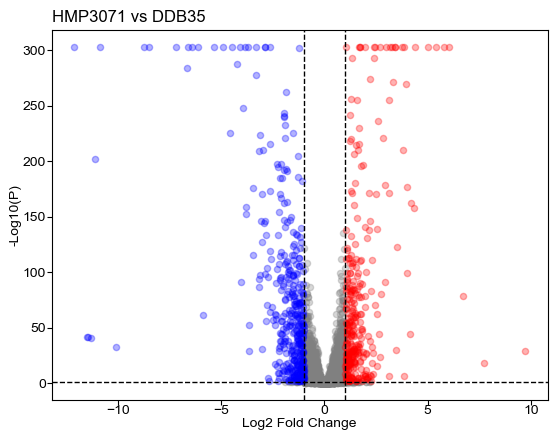

In [37]:
deg_df = strain_deg_df
fdr = 0.05
deg_fold_change_threshold = 2

fig, ax = plt.subplots()

# select insignificant genes
############################
ns_df = deg_df[((deg_df["padj"] > fdr) | ((deg_df["log2FoldChange"] > -np.log2(deg_fold_change_threshold)) & (deg_df["log2FoldChange"] < np.log2(deg_fold_change_threshold))))]
        
# select up genes
#################
up_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] >= np.log2(deg_fold_change_threshold)))]
up_df["direction"] = "up"
        
# select down genes
###################
down_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] <= -np.log2(deg_fold_change_threshold)))]
down_df["direction"] = "down"

# plot data
###########

# not significant
ax.scatter(ns_df['log2FoldChange'],-np.log10(ns_df['padj']),color='grey',alpha=0.3,label='NS',s=20)
# up genes
ax.scatter(up_df['log2FoldChange'],-np.log10(up_df['padj']),color='red',alpha=0.3,label='up',s=20)
# down genes
ax.scatter(down_df['log2FoldChange'],-np.log10(down_df['padj']),color='blue',alpha=0.3,label='down',s=20)

# customize axis label, titles, ticklabels

# Support lines
###############

# ax.set_ylim(-5,180)
# ax.set_xlim(-6.5,6.5)

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

ax.hlines(y=-np.log10(fdr), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],colors='k',linestyles="--",linewidth=1)
ax.vlines(x=np.log2(deg_fold_change_threshold),  ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=1)
ax.vlines(x=-np.log2(deg_fold_change_threshold), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=1)

# Title
#######

ax.set_title("HMP3071 vs DDB35", loc="left")

# Ax titles
###########

ax.set_xlabel("Log2 Fold Change")
ax.set_ylabel("-Log10(P)");

# Highlighting genes

In [677]:
cc_genes_name_list = [
    "ptsG",
    "crr",
    "glk",
    "pgi",
    "pgm",
    "pfkA",
    "pfkB",
    "fbp",
    "fbaA",
    "fbaB",
    "tpiA",
    "gapA",
    "pgk",
    "gpmA",
    "eno",
    "pykA",
    "pykF",
    "aceE",
    "aceF",
    "lpd",
    "pflB",
    "tdcE",
    "zwf",
    "pgl",
    "gnd",
    "rpiA",
    "rpiB",
    "rpe",
    "tktA",
    "tktB",
    "talA",
    "talB",
    "edd",
    "eda",
    "gltA",
    "prpC",
    "acnA",
    "acnB",
    "icd",
    "sucA",
    "sucB",
    "sucC",
    "sucD",
    "sdhA",
    "sdhB",
    "sdhC",
    "sdhD",
    "frdA",
    "frdB",
    "frdC",
    "frdD",
    "fumA",
    "fumB",
    "fumC",
    "mdh",
    "aceA",
    "aceB",
    "ppc",
    "pck",
    "maeA",
    "maeB",
    "ppsA",
    "pta",
    "ackA",
    "mgsA",
    "arcA",
    "arcB",
    "cra",
    "crp",
    "fnr",
    "mlc",
    "iclR",
    "fur",
    "pdhR",
    "ihfA",
    "ihfB"
]

In [678]:
trp_genes_name_list = [
    "yedA",
    "aroF",
    "aroG",
    "aroH",
    "aroB",
    "aroD",
    "aroE",
    "aroK",
    "aroL",
    "aroA",
    "aroC",
    "ydiB",
    "pheA",
    "tyrA",
    "trpD",
    "trpE",
    "trpC",
    "trpA",
    "trpB",
    "tnaA",
    "tnaB",
    "aroP",
    "mtr",
    "yddG"
]

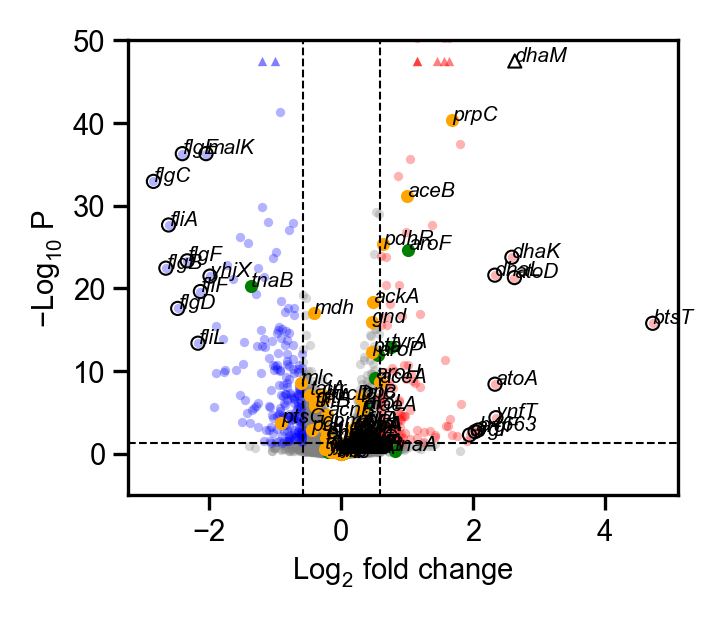

In [681]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2
plt.rcParams['axes.labelpad']= 2


fig, ax = plt.subplots(dpi=300)

### Volcano Plots

### WT strain

deg_df = sd_deg_hmp3071_df
fdr = 0.05
deg_fold_change_threshold = 1.5

# select insignificant genes
############################
ns_df = deg_df[((deg_df["padj"] > fdr) | ((deg_df["log2FoldChange"] > -np.log2(deg_fold_change_threshold)) & (deg_df["log2FoldChange"] < np.log2(deg_fold_change_threshold))))]       
# select up genes
#################
up_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] >= np.log2(deg_fold_change_threshold)))]
up_df["direction"] = "up"      
# select down genes
###################
down_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] <= -np.log2(deg_fold_change_threshold)))]
down_df["direction"] = "down"

# plot data
###########

# not significant
ax.scatter(ns_df['log2FoldChange'],-np.log10(ns_df['padj']),color='grey',alpha=0.3,label='NS',s=5,linewidths=0)
# up genes
ax.scatter(up_df['log2FoldChange'],-np.log10(up_df['padj']),color='red',alpha=0.3,label='up',s=5,linewidths=0)
# down genes
ax.scatter(down_df['log2FoldChange'],-np.log10(down_df['padj']),color='blue',alpha=0.3,label='down',s=5,linewidths=0)

# Support lines
###############

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
ax.hlines(y=-np.log10(fdr), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],colors='k',linestyles="--",linewidth=0.5)
ax.vlines(x=np.log2(deg_fold_change_threshold),  ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=0.5)
ax.vlines(x=-np.log2(deg_fold_change_threshold), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=0.5)

ax.set_ylabel("$-Log_{10}$ P")
ax.set_xlabel("$Log_{2}$ fold change")

##########################
### highlighting trp genes
##########################

# gene_names = cc_genes_name_list
gene_names = trp_genes_name_list
trp_genes = []
for gene_name in gene_names:
    trp_genes.append(ica_data.name2num(gene_name))

ax.scatter(deg_df.loc[trp_genes]['log2FoldChange'],-np.log10(deg_df.loc[trp_genes]['padj']),color="green",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0)
for gene in deg_df.loc[trp_genes].index:
    gene_name = ica_data.num2name(gene)
    ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
##########################
### highlighting ccm genes
##########################

gene_names = cc_genes_name_list
# gene_names = trp_genes_name_list
cc_genes = []
for gene_name in gene_names:
    cc_genes.append(ica_data.name2num(gene_name))

ax.scatter(deg_df.loc[cc_genes]['log2FoldChange'],-np.log10(deg_df.loc[cc_genes]['padj']),color="orange",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0)
for gene in deg_df.loc[cc_genes].index:
    try:
        gene_name = ica_data.num2name(gene)
        ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    except:
        gene_name = gene
        ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
##########################
### highlighting top genes
##########################

high = deg_df[["log2FoldChange", "padj"]].dropna().sort_values("log2FoldChange").tail(10).index
low = deg_df[["log2FoldChange", "padj"]].dropna().sort_values("log2FoldChange").head(10).index

top_genes = []

for gene in high:
    top_genes.append(gene)
for gene in low:
    top_genes.append(gene)

ax.scatter(deg_df.loc[top_genes]['log2FoldChange'],-np.log10(deg_df.loc[top_genes]['padj']),color="None",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0.5)
for gene in deg_df.loc[top_genes].index:
    try:
        gene_name = ica_data.num2name(gene)
        ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    except:
        gene_name = gene
        ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
y_upper = 50
y_lower = -5

ax.set_ylim(y_lower, y_upper)

upper_limit_df = deg_df[-np.log10(deg_df["padj"]) > y_upper]

try:
    for gene in upper_limit_df.index:
        if gene in top_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="None",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0.5)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        elif gene in cc_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="orange",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        elif gene in trp_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="green",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        else:
            if upper_limit_df.loc[gene]["log2FoldChange"] > 0:
                ax.scatter(upper_limit_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color='red',alpha=0.5,s=5,linewidths=0,marker="^")
            else:
                ax.scatter(upper_limit_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color='blue',alpha=0.5,s=5,linewidths=0,marker="^")
except:
    pass
        

h=50/25.4
w=60/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("HMP_sd_DEG_volcano_raw.svg", dpi=900);

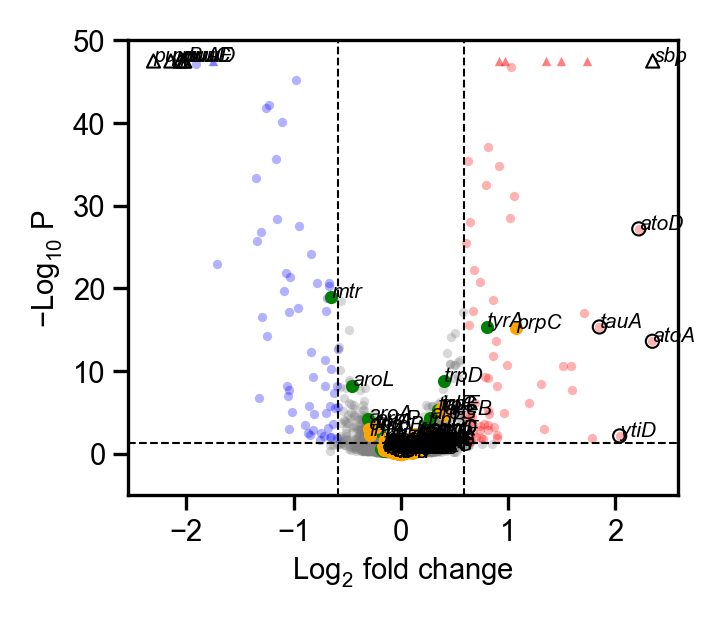

In [155]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2
plt.rcParams['axes.labelpad']= 2


fig, ax = plt.subplots(dpi=300)

### Volcano Plots

### WT strain

deg_df = sd_deg_ddb35_df
fdr = 0.05
deg_fold_change_threshold = 1.5

# select insignificant genes
############################
ns_df = deg_df[((deg_df["padj"] > fdr) | ((deg_df["log2FoldChange"] > -np.log2(deg_fold_change_threshold)) & (deg_df["log2FoldChange"] < np.log2(deg_fold_change_threshold))))]       
# select up genes
#################
up_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] >= np.log2(deg_fold_change_threshold)))]
up_df["direction"] = "up"      
# select down genes
###################
down_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] <= -np.log2(deg_fold_change_threshold)))]
down_df["direction"] = "down"

# plot data
###########

# not significant
ax.scatter(ns_df['log2FoldChange'],-np.log10(ns_df['padj']),color='grey',alpha=0.3,label='NS',s=5,linewidths=0)
# up genes
ax.scatter(up_df['log2FoldChange'],-np.log10(up_df['padj']),color='red',alpha=0.3,label='up',s=5,linewidths=0)
# down genes
ax.scatter(down_df['log2FoldChange'],-np.log10(down_df['padj']),color='blue',alpha=0.3,label='down',s=5,linewidths=0)

# Support lines
###############

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
ax.hlines(y=-np.log10(fdr), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],colors='k',linestyles="--",linewidth=0.5)
ax.vlines(x=np.log2(deg_fold_change_threshold),  ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=0.5)
ax.vlines(x=-np.log2(deg_fold_change_threshold), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=0.5)

ax.set_ylabel("$-Log_{10}$ P")
ax.set_xlabel("$Log_{2}$ fold change")

##########################
### highlighting trp genes
##########################

# gene_names = cc_genes_name_list
gene_names = trp_genes_name_list
trp_genes = []
for gene_name in gene_names:
    trp_genes.append(ica_data.name2num(gene_name))

ax.scatter(deg_df.loc[trp_genes]['log2FoldChange'],-np.log10(deg_df.loc[trp_genes]['padj']),color="green",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0)
for gene in deg_df.loc[trp_genes].index:
    gene_name = ica_data.num2name(gene)
    ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
##########################
### highlighting ccm genes
##########################

gene_names = cc_genes_name_list
# gene_names = trp_genes_name_list
cc_genes = []
for gene_name in gene_names:
    cc_genes.append(ica_data.name2num(gene_name))

ax.scatter(deg_df.loc[cc_genes]['log2FoldChange'],-np.log10(deg_df.loc[cc_genes]['padj']),color="orange",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0)
for gene in deg_df.loc[cc_genes].index:
    gene_name = ica_data.num2name(gene)
    ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
##########################
### highlighting top genes
##########################

high = deg_df[["log2FoldChange", "padj"]].dropna().sort_values("log2FoldChange").tail(5).index
low = deg_df[["log2FoldChange", "padj"]].dropna().sort_values("log2FoldChange").head(5).index

top_genes = []

for gene in high:
    top_genes.append(gene)
for gene in low:
    top_genes.append(gene)

ax.scatter(deg_df.loc[top_genes]['log2FoldChange'],-np.log10(deg_df.loc[top_genes]['padj']),color="None",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0.5)
for gene in deg_df.loc[top_genes].index:
    gene_name = ica_data.num2name(gene)
    ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
y_upper = 50
y_lower = -5

ax.set_ylim(y_lower, y_upper)

upper_limit_df = deg_df[-np.log10(deg_df["padj"]) > y_upper]

try:
    for gene in upper_limit_df.index:
        if gene in top_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="None",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0.5)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        elif gene in cc_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="orange",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        elif gene in trp_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="green",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        else:
            if upper_limit_df.loc[gene]["log2FoldChange"] > 0:
                ax.scatter(upper_limit_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color='red',alpha=0.5,s=5,linewidths=0,marker="^")
            else:
                ax.scatter(upper_limit_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color='blue',alpha=0.5,s=5,linewidths=0,marker="^")
except:
    pass
        

h=50/25.4
w=60/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("DDB_sd_DEG_volcano_raw.svg", dpi=900);

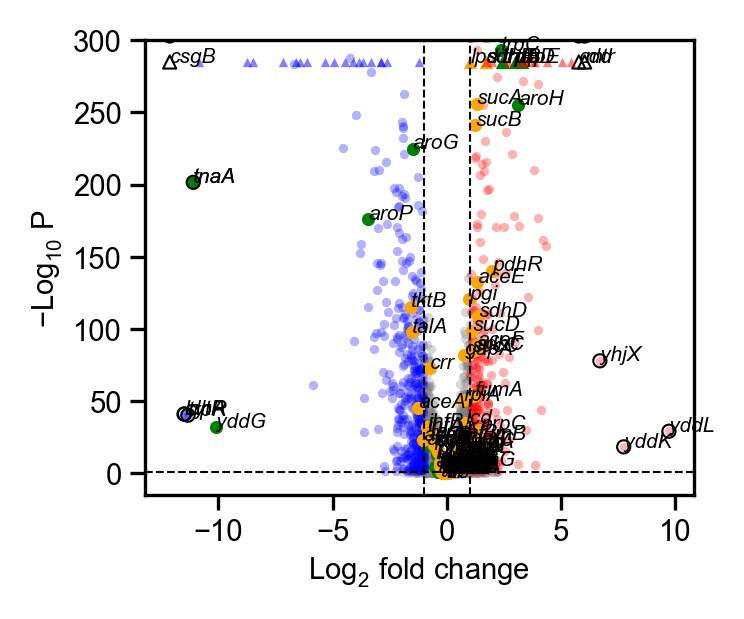

In [151]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2
plt.rcParams['axes.labelpad']= 2


fig, ax = plt.subplots(dpi=300)

### Volcano Plots

### WT strain

deg_df = strain_deg_df
fdr = 0.05
deg_fold_change_threshold = 2

# select insignificant genes
############################
ns_df = deg_df[((deg_df["padj"] > fdr) | ((deg_df["log2FoldChange"] > -np.log2(deg_fold_change_threshold)) & (deg_df["log2FoldChange"] < np.log2(deg_fold_change_threshold))))]       
# select up genes
#################
up_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] >= np.log2(deg_fold_change_threshold)))]
up_df["direction"] = "up"      
# select down genes
###################
down_df = deg_df[((deg_df["padj"] <= fdr) & (deg_df["log2FoldChange"] <= -np.log2(deg_fold_change_threshold)))]
down_df["direction"] = "down"

# plot data
###########

# not significant
ax.scatter(ns_df['log2FoldChange'],-np.log10(ns_df['padj']),color='grey',alpha=0.3,label='NS',s=5,linewidths=0)
# up genes
ax.scatter(up_df['log2FoldChange'],-np.log10(up_df['padj']),color='red',alpha=0.3,label='up',s=5,linewidths=0)
# down genes
ax.scatter(down_df['log2FoldChange'],-np.log10(down_df['padj']),color='blue',alpha=0.3,label='down',s=5,linewidths=0)

# Support lines
###############

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
ax.hlines(y=-np.log10(fdr), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],colors='k',linestyles="--",linewidth=0.5)
ax.vlines(x=np.log2(deg_fold_change_threshold),  ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=0.5)
ax.vlines(x=-np.log2(deg_fold_change_threshold), ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],colors='k',linestyles="--",linewidth=0.5)

ax.set_ylabel("$-Log_{10}$ P")
ax.set_xlabel("$Log_{2}$ fold change")

##########################
### highlighting trp genes
##########################

# gene_names = cc_genes_name_list
gene_names = trp_genes_name_list
trp_genes = []
for gene_name in gene_names:
    trp_genes.append(ica_data.name2num(gene_name))

ax.scatter(deg_df.loc[trp_genes]['log2FoldChange'],-np.log10(deg_df.loc[trp_genes]['padj']),color="green",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0)
for gene in deg_df.loc[trp_genes].index:
    gene_name = ica_data.num2name(gene)
    ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
##########################
### highlighting ccm genes
##########################

gene_names = cc_genes_name_list
# gene_names = trp_genes_name_list
cc_genes = []
for gene_name in gene_names:
    cc_genes.append(ica_data.name2num(gene_name))

ax.scatter(deg_df.loc[cc_genes]['log2FoldChange'],-np.log10(deg_df.loc[cc_genes]['padj']),color="orange",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0)
for gene in deg_df.loc[cc_genes].index:
    gene_name = ica_data.num2name(gene)
    ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
##########################
### highlighting top genes
##########################

high = deg_df[["log2FoldChange", "padj"]].dropna().sort_values("log2FoldChange").tail(5).index
low = deg_df[["log2FoldChange", "padj"]].dropna().sort_values("log2FoldChange").head(5).index

top_genes = []

for gene in high:
    top_genes.append(gene)
for gene in low:
    top_genes.append(gene)

ax.scatter(deg_df.loc[top_genes]['log2FoldChange'],-np.log10(deg_df.loc[top_genes]['padj']),color="None",alpha=1.0,s=10,marker="o",edgecolors="k",linewidths=0.5)
for gene in deg_df.loc[top_genes].index:
    gene_name = ica_data.num2name(gene)
    ax.annotate(text=gene_name, xy=(deg_df.loc[gene]['log2FoldChange'], -np.log10(deg_df.loc[gene]['padj'])), size=5, fontstyle="italic")
    
y_upper = 300
y_lower = -15

ax.set_ylim(y_lower, y_upper)

upper_limit_df = deg_df[-np.log10(deg_df["padj"]) > y_upper]

try:
    for gene in upper_limit_df.index:
        if gene in top_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="None",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0.5)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        elif gene in cc_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="orange",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        elif gene in trp_genes:
            ax.scatter(deg_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color="green",alpha=1.0,s=10,marker="^",edgecolors="k",linewidths=0)
            ax.annotate(text=ica_data.num2name(gene), xy=(deg_df.loc[gene]['log2FoldChange'], y_upper-y_upper*0.05), size=5, fontstyle="italic")
        else:
            if upper_limit_df.loc[gene]["log2FoldChange"] > 0:
                ax.scatter(upper_limit_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color='red',alpha=0.5,s=5,linewidths=0,marker="^")
            else:
                ax.scatter(upper_limit_df.loc[gene]['log2FoldChange'],y_upper-y_upper*0.05,color='blue',alpha=0.5,s=5,linewidths=0,marker="^")
except:
    pass
        

h=50/25.4
w=60/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("Strain_DEG_volcano_raw.svg", dpi=900);

# iModulon barplots

## Strain DiMAs

In [744]:
df = table_hmp_vs_ddb[table_hmp_vs_ddb["pvalue"] < 0.05]

# combining iModulons (from strain and scale-down DiMAs) to be plotted
iMs = df.index.unique()

In [745]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
df1 = trp_ica_data.A.T[all_iMs]
df2 = combined_ica_data.A.T[all_iMs]
df1 = pd.concat([df1, sample_table], axis=1)
df1 = df1.sort_values("condition")

In [746]:
ddb_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index
ddb_fed_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Fed-batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index

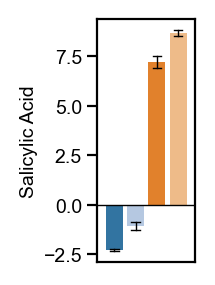

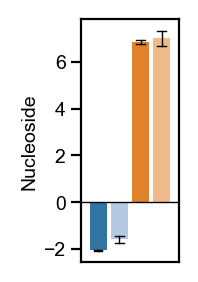

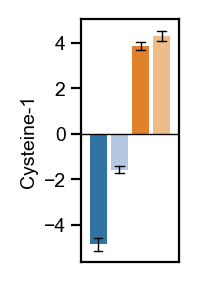

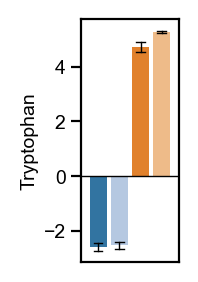

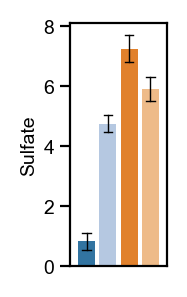

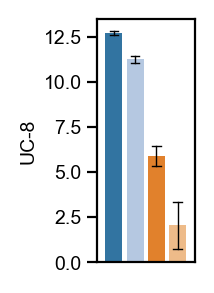

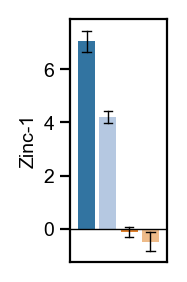

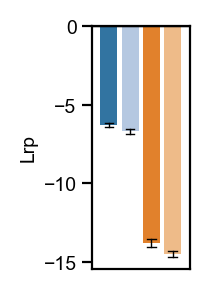

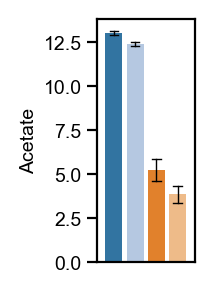

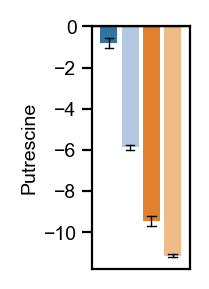

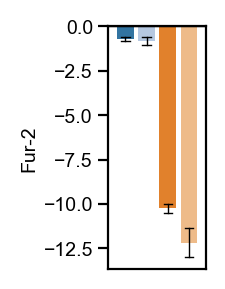

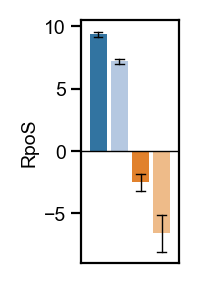

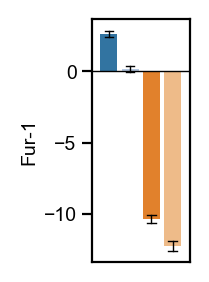

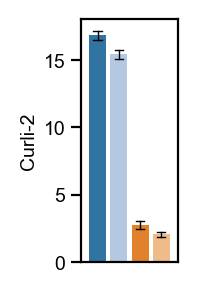

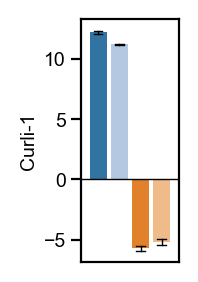

In [747]:
for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=0.5,
        capsize=0.4
    )

    # kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

    # sns.scatterplot(
    #     data=df1,
    #     x="condition",
    #     y=iM,
    #     edgecolor="k",
    #     markers=["o"],
    #     **kws,
    #     ax=ax
    # )

#     df2.boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[4.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

#     df2.loc[ddb_batch_samples].boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[5.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

#     df2.loc[ddb_fed_batch_samples].boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[6.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

    ax.set_xlim(-0.8, 3.8)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    # ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=16/25.4
    h=40/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("strain_DiMA_iM_barplots_no_p1k/"+iM.replace("/","-")+".svg", dpi=900)

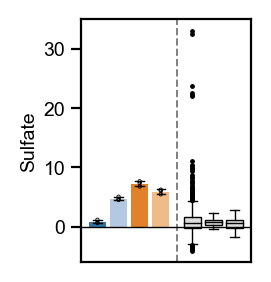

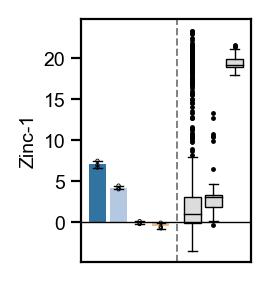

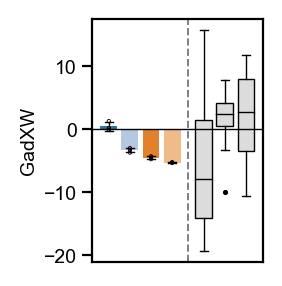

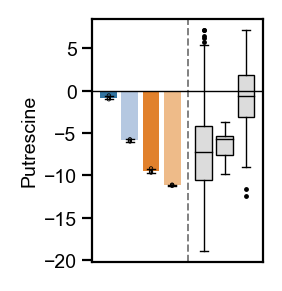

In [767]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2
plt.rcParams['axes.labelpad']= 2

for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=0.5,
        capsize=0.4
    )

    kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

    sns.scatterplot(
        data=df1,
        x="condition",
        y=iM,
        edgecolor="k",
        markers=["o"],
        **kws,
        ax=ax
    )

    df2.boxplot(
        ax=ax, 
        column=iM, 
        positions=[4.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[5.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_fed_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[6.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    ax.set_xlim(-0.8, 7.3)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=28/25.4
    h=40/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("Strain_DiMA_iM_barplots/"+iM.replace("/","-")+".svg", dpi=900)

## DDB35 sd DiMAs

In [748]:
df = table_1[table_1["pvalue"] < 0.05]

# combining iModulons (from strain and scale-down DiMAs) to be plotted
iMs = df.index.unique()

In [749]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
df1 = trp_ica_data.A.T[all_iMs]
df2 = combined_ica_data.A.T[all_iMs]
df1 = pd.concat([df1, sample_table], axis=1)
df1 = df1.sort_values("condition")

In [750]:
ddb_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index
ddb_fed_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Fed-batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index

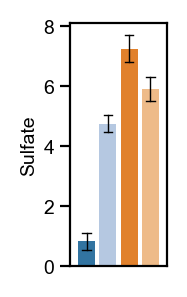

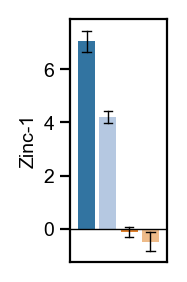

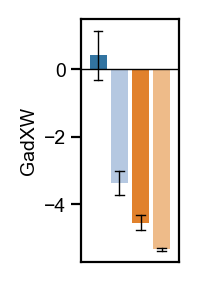

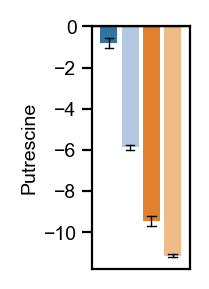

In [751]:
for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=0.5,
        capsize=0.4
    )

    # kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

    # sns.scatterplot(
    #     data=df1,
    #     x="condition",
    #     y=iM,
    #     edgecolor="k",
    #     markers=["o"],
    #     **kws,
    #     ax=ax
    # )

#     df2.boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[4.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

#     df2.loc[ddb_batch_samples].boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[5.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

#     df2.loc[ddb_fed_batch_samples].boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[6.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

    ax.set_xlim(-0.8, 3.8)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    # ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=16/25.4
    h=40/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("DDB35_sd_DiMA_iM_barplots_no_p1k/"+iM.replace("/","-")+".svg", dpi=900)

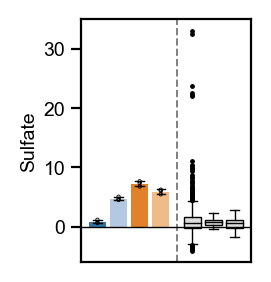

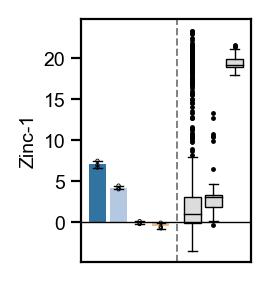

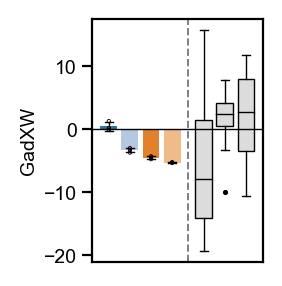

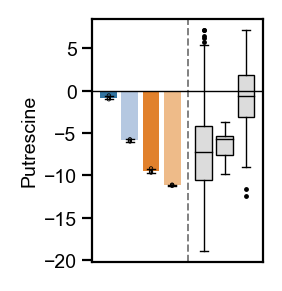

In [768]:
for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=0.5,
        capsize=0.4
    )

    kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

    sns.scatterplot(
        data=df1,
        x="condition",
        y=iM,
        edgecolor="k",
        markers=["o"],
        **kws,
        ax=ax
    )

    df2.boxplot(
        ax=ax, 
        column=iM, 
        positions=[4.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[5.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_fed_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[6.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    ax.set_xlim(-0.8, 7.3)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=28/25.4
    h=40/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("DDB35_sd_DiMA_iM_barplots/"+iM.replace("/","-")+".svg", dpi=900)

## HMP3071 sd DiMAs

In [769]:
df = table_2[table_2["pvalue"] < 0.05]

# combining iModulons (from strain and scale-down DiMAs) to be plotted
iMs = df.index.unique()

In [770]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
df1 = trp_ica_data.A.T[all_iMs]
df2 = combined_ica_data.A.T[all_iMs]
df1 = pd.concat([df1, sample_table], axis=1)
df1 = df1.sort_values("condition")

In [771]:
ddb_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index
ddb_fed_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Fed-batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index

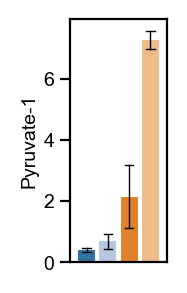

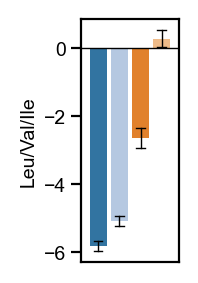

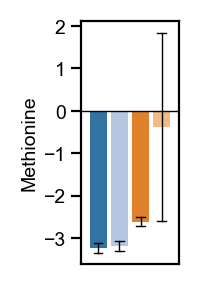

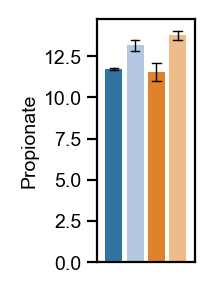

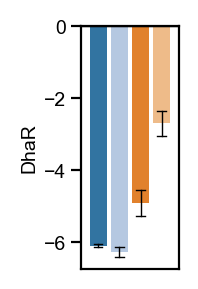

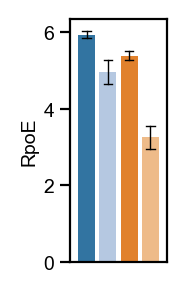

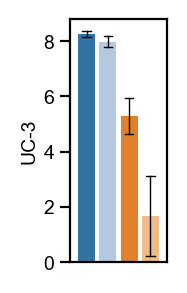

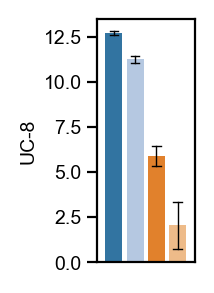

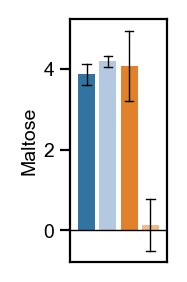

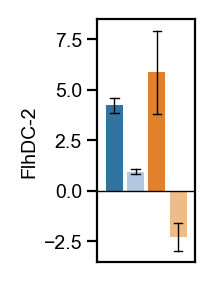

In [743]:
for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=0.5,
        capsize=0.4
    )

    # kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

    # sns.scatterplot(
    #     data=df1,
    #     x="condition",
    #     y=iM,
    #     edgecolor="k",
    #     markers=["o"],
    #     **kws,
    #     ax=ax
    # )

#     df2.boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[4.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

#     df2.loc[ddb_batch_samples].boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[5.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

#     df2.loc[ddb_fed_batch_samples].boxplot(
#         ax=ax, 
#         column=iM, 
#         positions=[6.5],
#         grid=False, 
#         widths=0.8,
#         boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
#         capprops=dict(linewidth=0.5,color="k"),
#         whiskerprops=dict(linewidth=0.5,color="k"),
#         medianprops=dict(linewidth=0.5,color="k"),
#         flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
#         patch_artist=True,
#         color="k"
#     )

    ax.set_xlim(-0.8, 3.8)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    # ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=16/25.4
    h=40/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("HMP3071_sd_DiMA_iM_barplots_no_p1k/"+iM.replace("/","-")+".svg", dpi=900)

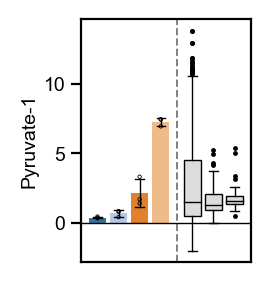

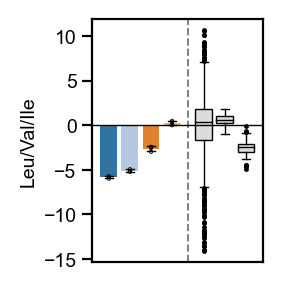

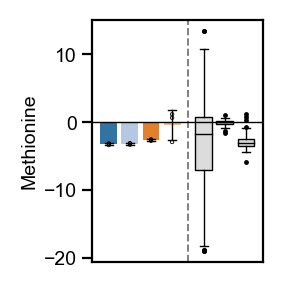

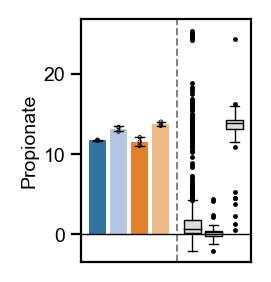

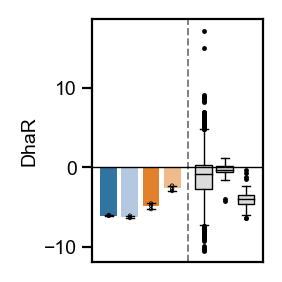

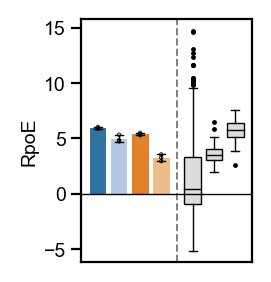

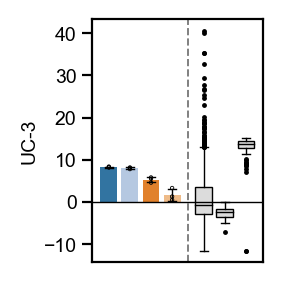

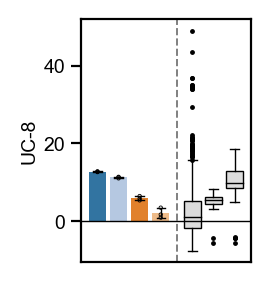

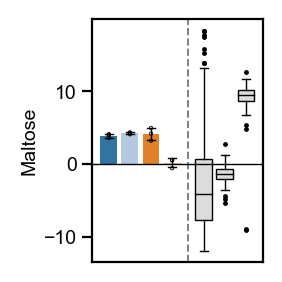

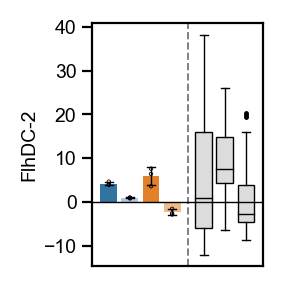

In [772]:
for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=0.5,
        capsize=0.4
    )

#     kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

#     sns.scatterplot(
#         data=df1,
#         x="condition",
#         y=iM,
#         edgecolor="k",
#         markers=["o"],
#         **kws,
#         ax=ax
#     )

    df2.boxplot(
        ax=ax, 
        column=iM, 
        positions=[4.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[5.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_fed_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[6.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    ax.set_xlim(-0.8, 7.3)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=28/25.4
    h=40/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("HMP3071_sd_DiMA_iM_barplots/"+iM.replace("/","-")+".svg", dpi=900)

# iM barplot (single, and all DiMAs)

In [76]:
# combining iModulons (from strain and scale-down DiMAs) to be plotted
iMs = pd.concat([table_hmp_vs_ddb,table_1,table_2]).index.unique()
iMs = pd.concat([table_2]).index.unique()
all_iMs = ica_data.M.columns

In [77]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
df1 = trp_ica_data.A.T[all_iMs]
df2 = combined_ica_data.A.T[all_iMs]
df1 = pd.concat([df1, sample_table], axis=1)
df1 = df1.sort_values("condition")

In [78]:
ddb_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index
ddb_fed_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Fed-batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index

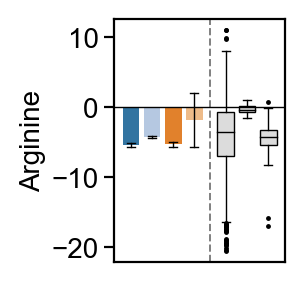

In [79]:
iM = "Arginine"

fig, ax = plt.subplots(dpi=200)

sns.barplot(
    data=df1,
    x="condition",
    y=iM,
    order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
    palette="tab20",
    errorbar="sd",
    ax=ax,
    errcolor="k",
    errwidth=0.5,
    capsize=0.4
)

# kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

# sns.scatterplot(
#     data=df1,
#     x="condition",
#     y=iM,
#     edgecolor="k",
#     markers=["o"],
#     **kws,
#     ax=ax
# )

df2.boxplot(
    ax=ax, 
    column=iM, 
    positions=[4.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[5.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_fed_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[6.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

ax.set_xlim(-0.8, 7.3)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

ax.set_xticks([])
ax.set_xlabel("")

# ax.get_legend().remove()
w=28/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("iM_barplots/"+iM.replace("/","-")+".svg")

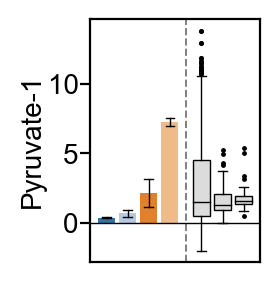

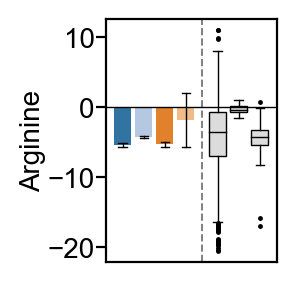

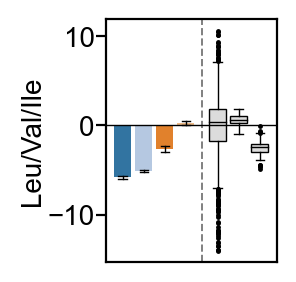

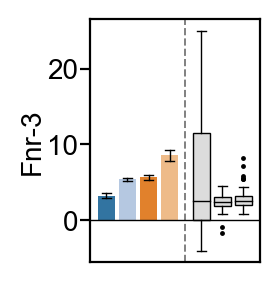

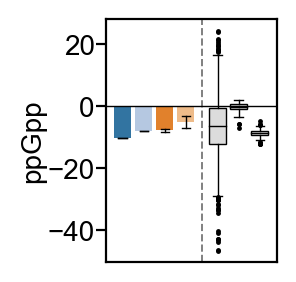

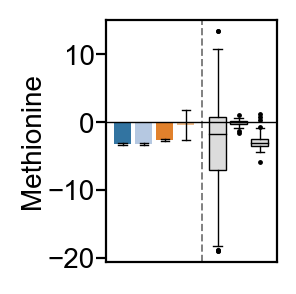

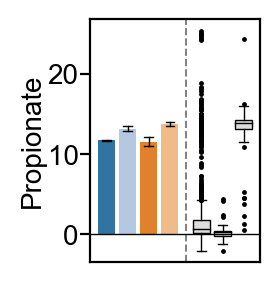

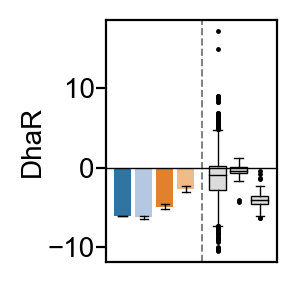

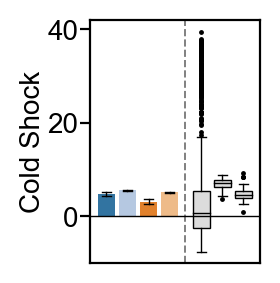

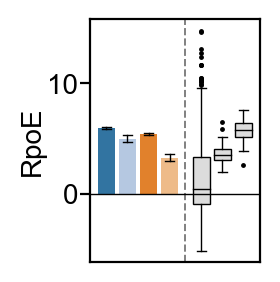

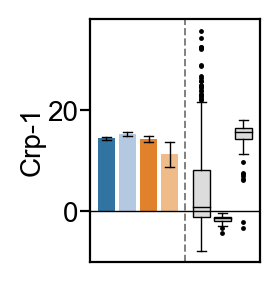

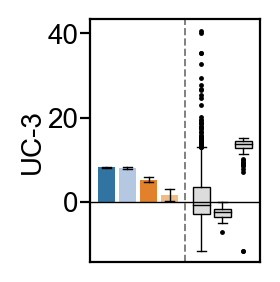

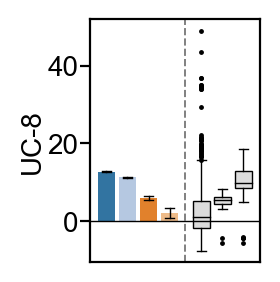

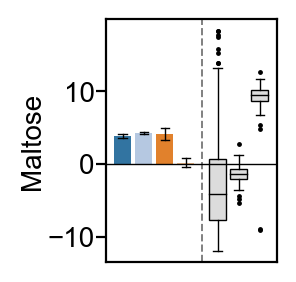

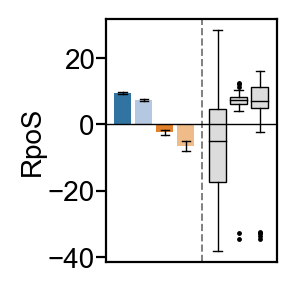

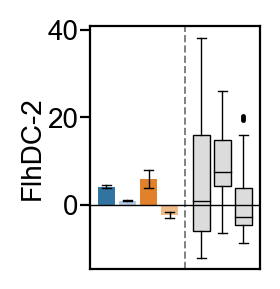

In [490]:
for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=0.5,
        capsize=0.4
    )

    # kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

    # sns.scatterplot(
    #     data=df1,
    #     x="condition",
    #     y=iM,
    #     edgecolor="k",
    #     markers=["o"],
    #     **kws,
    #     ax=ax
    # )

    df2.boxplot(
        ax=ax, 
        column=iM, 
        positions=[4.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[5.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_fed_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[6.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
        capprops=dict(linewidth=0.5,color="k"),
        whiskerprops=dict(linewidth=0.5,color="k"),
        medianprops=dict(linewidth=0.5,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
        patch_artist=True,
        color="k"
    )

    ax.set_xlim(-0.8, 7.3)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=28/25.4
    h=40/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("iM_barplots/"+iM.replace("/","-")+".svg", dpi=900)

# Gene barplot

In [100]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
df1 = trp_ica_data.X.T
df2 = combined_ica_data.X.T
df1 = pd.concat([df1, sample_table], axis=1)
df1 = df1.sort_values("condition")

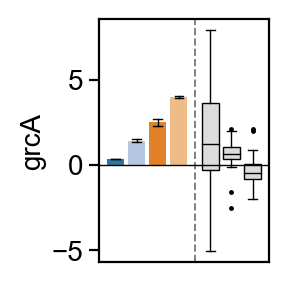

In [101]:
gene_name = "grcA"
gene = ica_data.name2num(gene_name)

fig, ax = plt.subplots(dpi=200)

sns.barplot(
    data=df1,
    x="condition",
    y=gene,
    order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
    palette="tab20",
    errorbar="sd",
    ax=ax,
    errcolor="k",
    errwidth=0.5,
    capsize=0.4
)

# kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

# sns.scatterplot(
#     data=df1,
#     x="condition",
#     y=iM,
#     edgecolor="k",
#     markers=["o"],
#     **kws,
#     ax=ax
# )

df2.boxplot(
    ax=ax, 
    column=gene, 
    positions=[4.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_batch_samples].boxplot(
    ax=ax, 
    column=gene, 
    positions=[5.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_fed_batch_samples].boxplot(
    ax=ax, 
    column=gene, 
    positions=[6.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

ax.set_xlim(-0.8, 7.3)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel(gene_name)

# ax.get_legend().remove()
w=28/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("gene_barplots/"+gene.replace("/","-")+".svg")

# Tryptophan

In [55]:
gene_name_list = [
    "yedA",
    "aroF",
    "aroG",
    "aroH",
    "aroB",
    "aroD",
    "aroE",
    "aroK",
    "aroL",
    "aroA",
    "aroC",
    "ydiB",
    "pheA",
    "tyrA",
    "trpD",
    "trpE",
    "trpC",
    "trpA",
    "trpB",
    "tnaA",
    "tnaB",
    "aroP",
    "mtr",
    "yddG"
]

## iModulons involved

In [58]:
gene_list = []

for gene_name in gene_name_list:
    
    gene_list.append(ica_data.name2num(gene_name))

In [73]:
df = ica_data.M_binarized.loc[gene_list].T[ica_data.M_binarized.loc[gene_list].sum(axis=0) != 0].T
df.index = gene_name_list
df

,PAL 10 Del,Tryptophan,BW25113,Gluconate,Membrane,UC-2,Tyr/Trp/Phe,Tryptophanase
yedA,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
aroF,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
aroG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aroH,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
aroB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aroD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aroE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
aroK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aroL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
aroA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Gene Start', ylabel='Tryptophanase Gene Weight'>

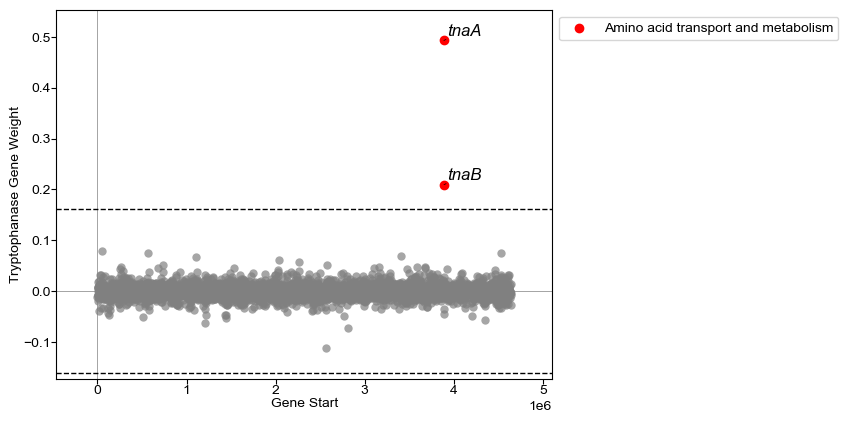

In [520]:
plot_gene_weights(
    ica_data=ica_data,
    imodulon="Tryptophanase")

<Axes: xlabel='Gene Start', ylabel='Tryptophan Gene Weight'>

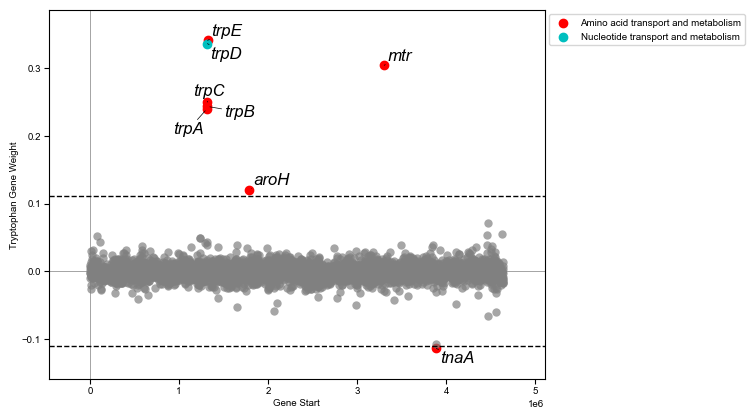

In [75]:
plot_gene_weights(
    ica_data=ica_data,
    imodulon="Tryptophan")

<Axes: xlabel='Gene Start', ylabel='Tyr/Trp/Phe Gene Weight'>

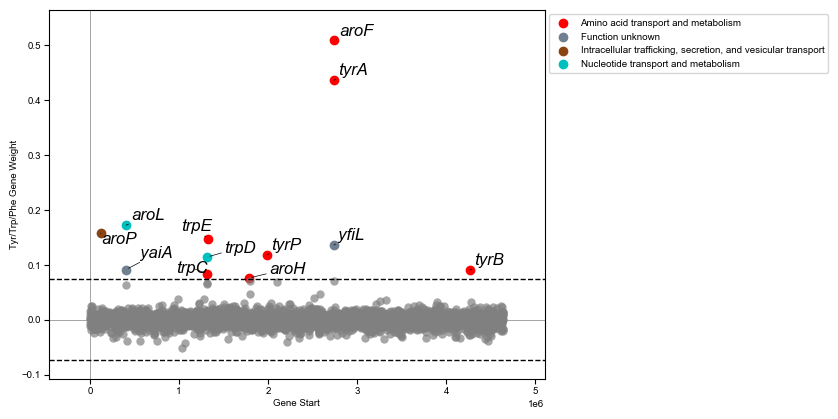

In [76]:
plot_gene_weights(
    ica_data=ica_data,
    imodulon="Tyr/Trp/Phe")

## iM barplot

In [514]:
# combining iModulons (from strain and scale-down DiMAs) to be plotted
iMs = pd.concat([table_hmp_vs_ddb,table_1,table_2]).index.unique()
iMs = pd.concat([table_2]).index.unique()
all_iMs = ica_data.M.columns

In [515]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
df1 = trp_ica_data.A.T[all_iMs]
df2 = combined_ica_data.A.T[all_iMs]
df1 = pd.concat([df1, sample_table], axis=1)
df1 = df1.sort_values("condition")

In [516]:
ddb_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index
ddb_fed_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Fed-batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index

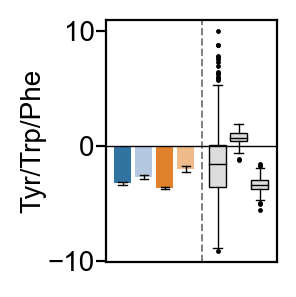

In [517]:
iM = "Tyr/Trp/Phe"

fig, ax = plt.subplots(dpi=200)

sns.barplot(
    data=df1,
    x="condition",
    y=iM,
    order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
    palette="tab20",
    errorbar="sd",
    ax=ax,
    errcolor="k",
    errwidth=0.5,
    capsize=0.4
)

# kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

# sns.scatterplot(
#     data=df1,
#     x="condition",
#     y=iM,
#     edgecolor="k",
#     markers=["o"],
#     **kws,
#     ax=ax
# )

df2.boxplot(
    ax=ax, 
    column=iM, 
    positions=[4.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[5.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_fed_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[6.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

ax.set_xlim(-0.8, 7.3)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

ax.set_xticks([])
ax.set_xlabel("")

# ax.get_legend().remove()
w=28/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("iM_barplots/"+iM.replace("/","-")+".svg")

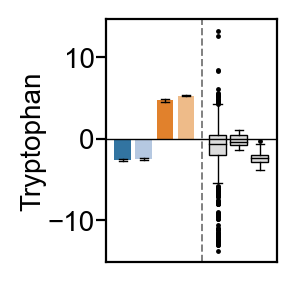

In [518]:
iM = "Tryptophan"

fig, ax = plt.subplots(dpi=200)

sns.barplot(
    data=df1,
    x="condition",
    y=iM,
    order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
    palette="tab20",
    errorbar="sd",
    ax=ax,
    errcolor="k",
    errwidth=0.5,
    capsize=0.4
)

# kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

# sns.scatterplot(
#     data=df1,
#     x="condition",
#     y=iM,
#     edgecolor="k",
#     markers=["o"],
#     **kws,
#     ax=ax
# )

df2.boxplot(
    ax=ax, 
    column=iM, 
    positions=[4.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[5.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_fed_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[6.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

ax.set_xlim(-0.8, 7.3)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

ax.set_xticks([])
ax.set_xlabel("")

# ax.get_legend().remove()
w=28/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("iM_barplots/"+iM.replace("/","-")+".svg")

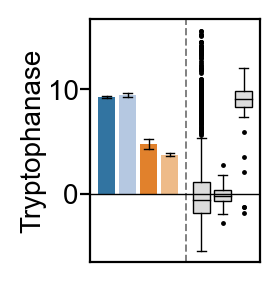

In [519]:
iM = "Tryptophanase"

fig, ax = plt.subplots(dpi=200)

sns.barplot(
    data=df1,
    x="condition",
    y=iM,
    order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
    palette="tab20",
    errorbar="sd",
    ax=ax,
    errcolor="k",
    errwidth=0.5,
    capsize=0.4
)

# kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

# sns.scatterplot(
#     data=df1,
#     x="condition",
#     y=iM,
#     edgecolor="k",
#     markers=["o"],
#     **kws,
#     ax=ax
# )

df2.boxplot(
    ax=ax, 
    column=iM, 
    positions=[4.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[5.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

df2.loc[ddb_fed_batch_samples].boxplot(
    ax=ax, 
    column=iM, 
    positions=[6.5],
    grid=False, 
    widths=0.8,
    boxprops=dict(color="k",linewidth=0.5,facecolor="gainsboro"),
    capprops=dict(linewidth=0.5,color="k"),
    whiskerprops=dict(linewidth=0.5,color="k"),
    medianprops=dict(linewidth=0.5,color="k"),
    flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=1.5),
    patch_artist=True,
    color="k"
)

ax.set_xlim(-0.8, 7.3)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=0.7)
ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=0.5)

ax.set_xticks([])
ax.set_xlabel("")

# ax.get_legend().remove()
w=28/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
plt.savefig("iM_barplots/"+iM.replace("/","-")+".svg")

# Phase planes

In [648]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

In [642]:
p1k_groups = {
    "omics__bw_ac__1":"bw_ac",
    "omics__bw_ac__2":"bw_ac",
    "omics__bw_fum__1":"bw_fum",
    "omics__bw_fum__2":"bw_fum",
    "omics__bw_pyr__1":"bw_pyr",
    "omics__bw_pyr__2":"bw_pyr",
    "DDB3__PD-009_del-tnaA_Batch_6h__1":"del-tnaA_Batch_6h",
    "DDB3__PD-009_del-tnaA_Fed-batch_6h":"del-tnaA_Fed-batch_6h",
    "DDB3__PD-009_del-tnaA_Fed-batch_15h":"del-tnaA_Fed-batch_15h",
    "DDB3__PD-009_del-tnaA_Fed-batch_15h":"del-tnaA_Fed-batch_15h"
}

In [646]:
DDB_table = ica_data.sample_table[(ica_data.sample_table.project == "DDB2") | (ica_data.sample_table.project == "DDB3")]
DDB_table = DDB_table[~DDB_table.condition.str.contains("tnaA")]
DDB_groups = DDB_table["Culture Type"].to_dict()

In [649]:
groups_1 = merge_two_dicts(p1k_groups, DDB_groups)

In [650]:
groups_2 = trp_ica_data.sample_table["condition"].sort_values().to_dict()

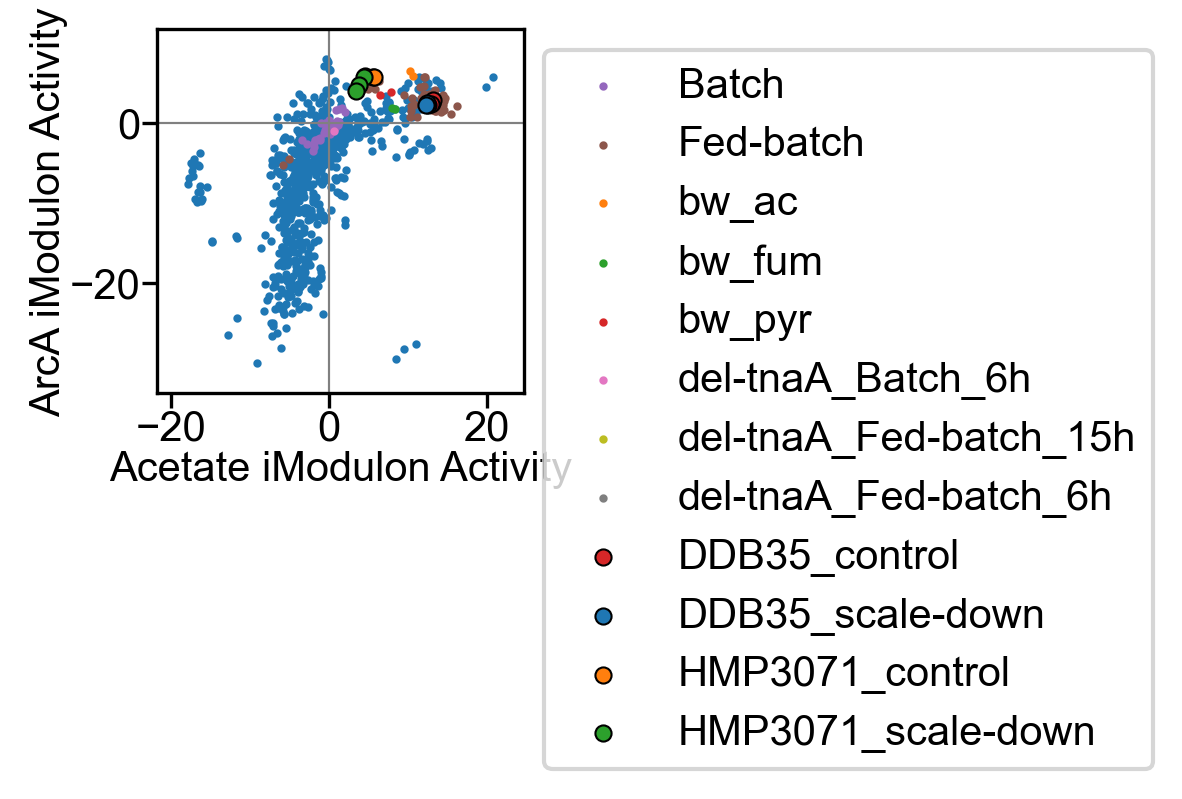

In [656]:
imodulon_2 = "ArcA"
imodulon_1 = "Acetate"

fig, ax = plt.subplots(dpi=300)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

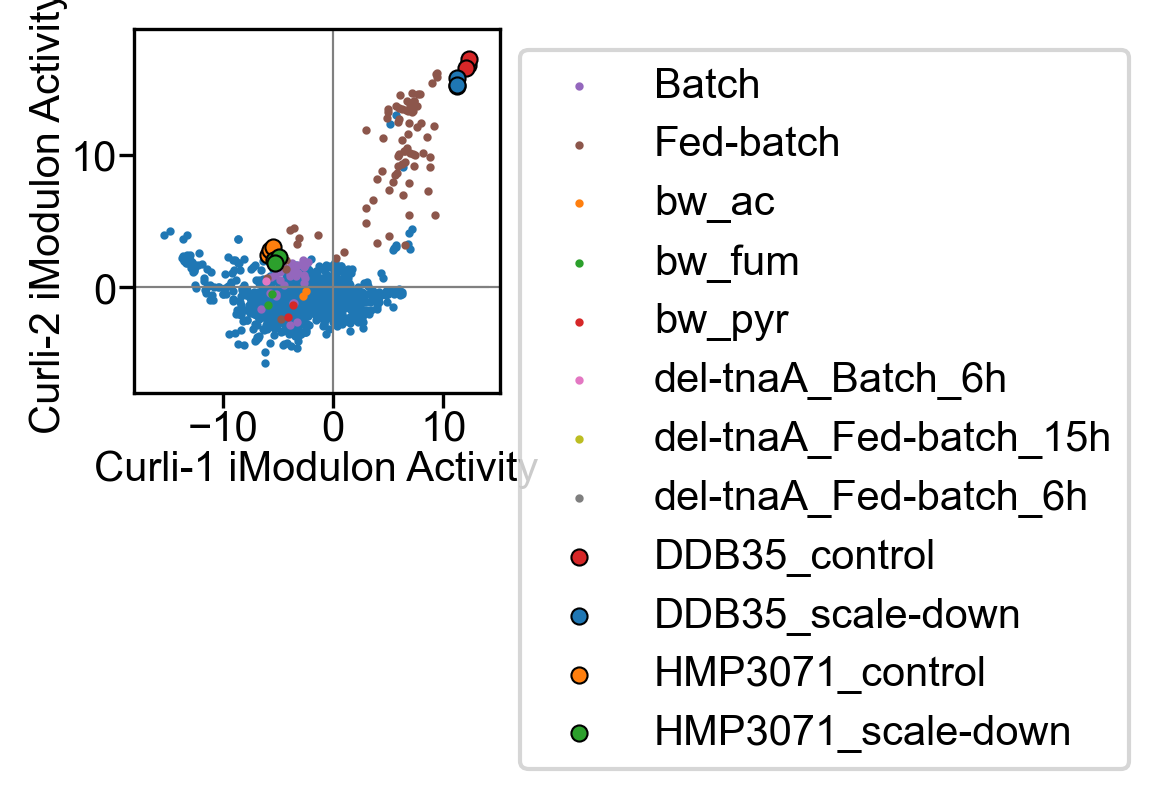

In [659]:
imodulon_1 = "Curli-1"
imodulon_2 = "Curli-2"

fig, ax = plt.subplots(dpi=300)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

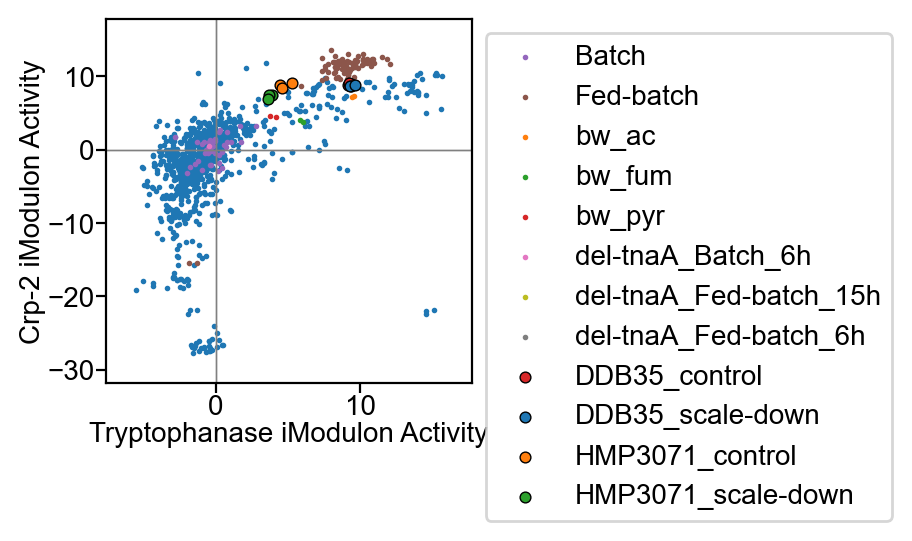

In [663]:
imodulon_1 = "Tryptophanase"
imodulon_2 = "Crp-2"

fig, ax = plt.subplots(dpi=200)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

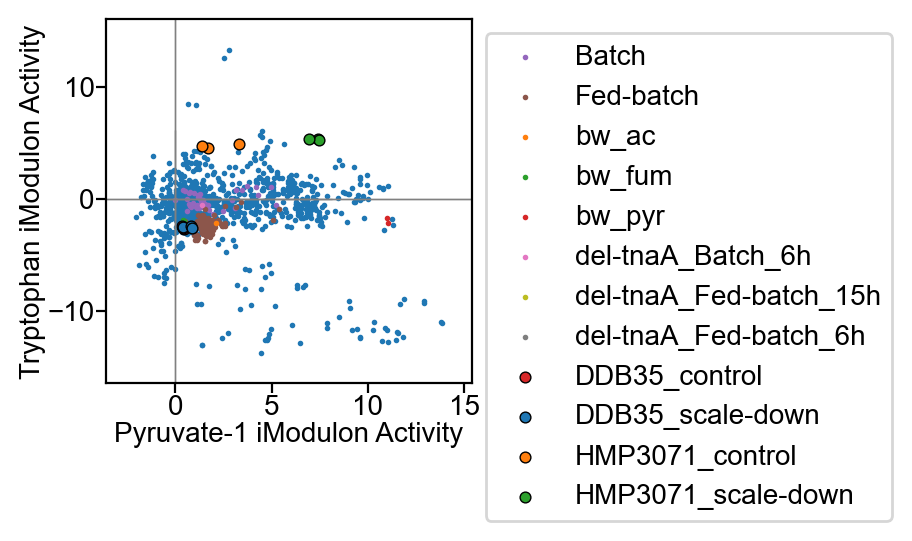

In [667]:
imodulon_1 = "Pyruvate-1"
imodulon_2 = "Tryptophan"

fig, ax = plt.subplots(dpi=200)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

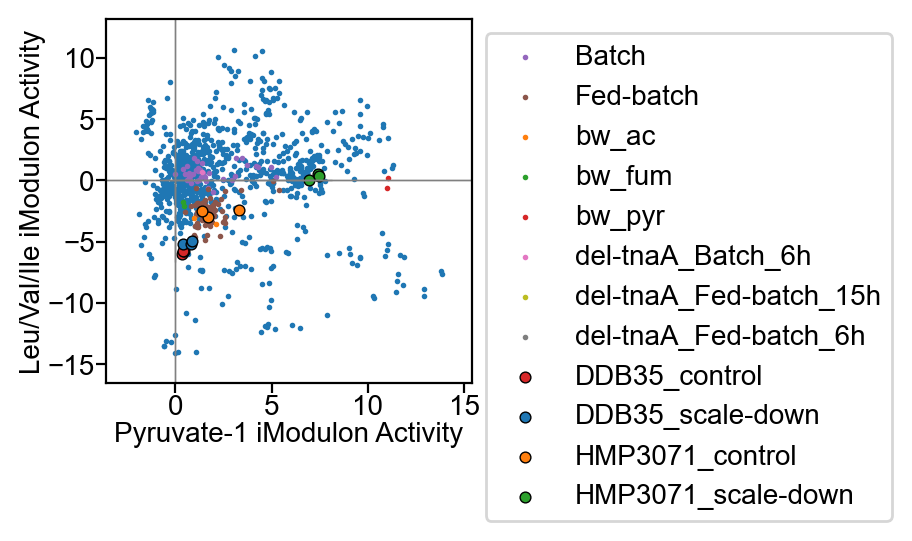

In [670]:
imodulon_1 = "Pyruvate-1"
imodulon_2 = "Leu/Val/Ile"

fig, ax = plt.subplots(dpi=200)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

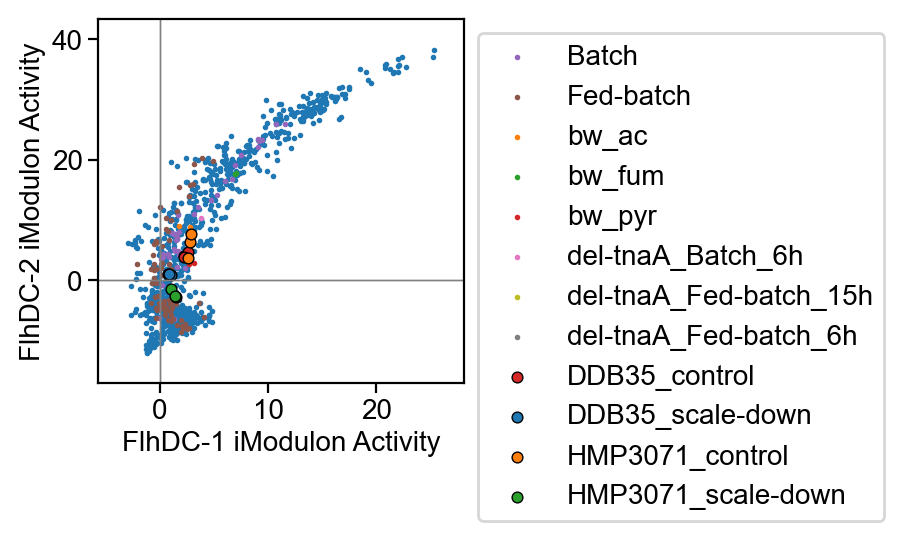

In [819]:
imodulon_1 = "FlhDC-1"
imodulon_2 = "FlhDC-2"

fig, ax = plt.subplots(dpi=200)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

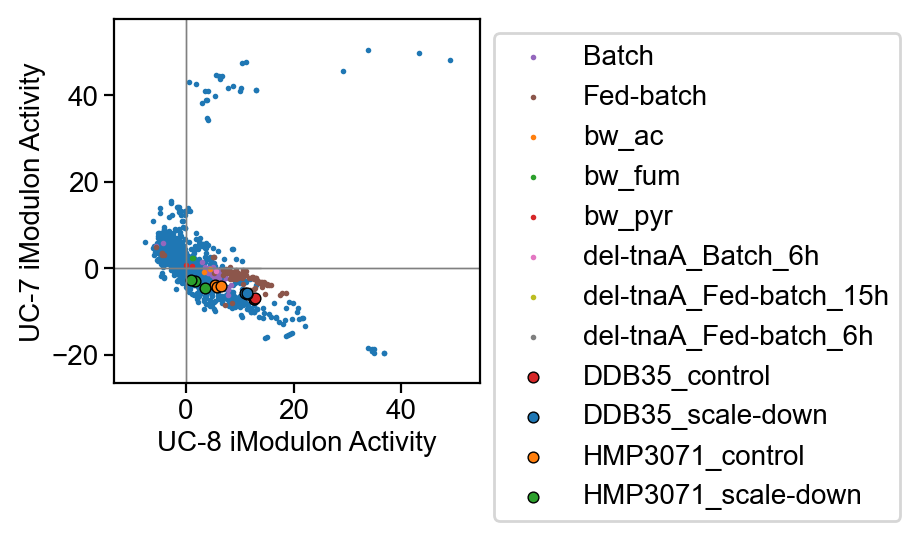

In [823]:
imodulon_1 = "UC-8"
imodulon_2 = "UC-7"

fig, ax = plt.subplots(dpi=200)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

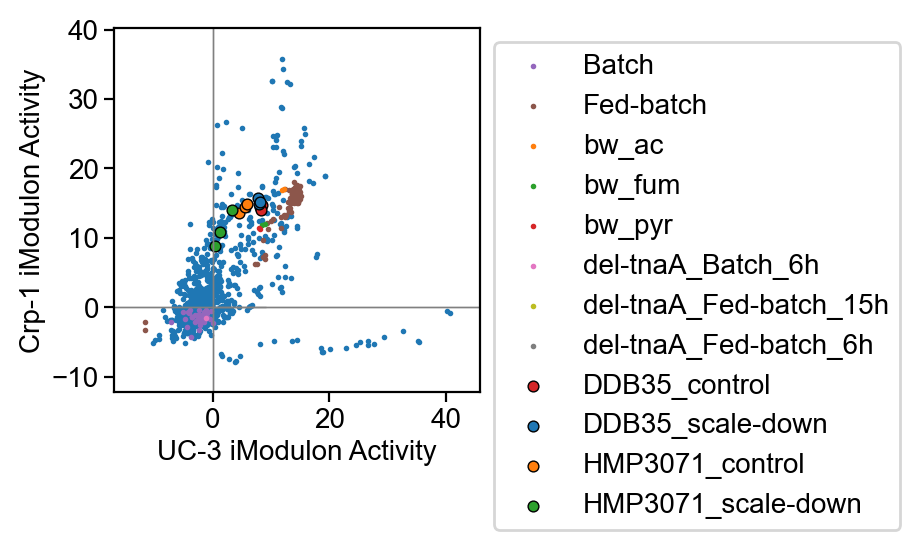

In [826]:
imodulon_1 = "UC-3"
imodulon_2 = "Crp-1"

fig, ax = plt.subplots(dpi=200)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

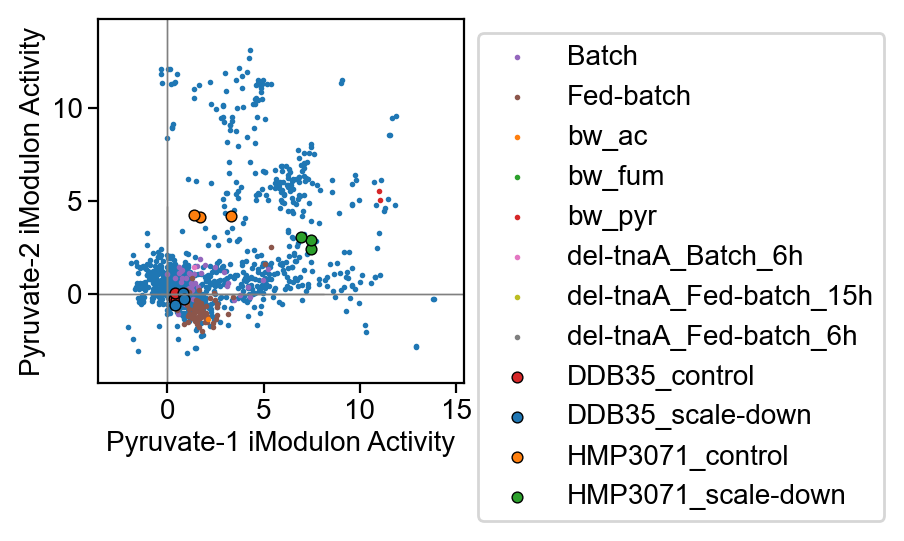

In [836]:
imodulon_1 = "Pyruvate-1"
imodulon_2 = "Pyruvate-2"

fig, ax = plt.subplots(dpi=200)

compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":1}, groups=groups_1, fit_metric=None)
compare_activities(trp_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":15,"marker":"o","edgecolors":"k","linewidths":0.5}, groups=groups_2, fit_metric=None, show_labels=False)
compare_activities(combined_ica_data,imodulon_1, imodulon_2, ax=ax, scatter_kwargs={"s":0}, groups=None,colors="gainsboro", fit_metric=None)

ax.legend(loc="upper left",bbox_to_anchor=(1,1))

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

# Selected barplots

In [812]:
# iMs = ["Acetate","Curli-2"]
iMs = ["Fur-1", "Putrescine", "Sulfate", "Cysteine-1"]

In [813]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
df1 = trp_ica_data.A.T[all_iMs]
df2 = combined_ica_data.A.T[all_iMs]
df1 = pd.concat([df1, sample_table], axis=1)
df1 = df1.sort_values("condition")

In [814]:
ddb_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index
ddb_fed_batch_samples = combined_ica_data.sample_table[(combined_ica_data.sample_table["Culture Type"] == "Fed-batch") & ((combined_ica_data.sample_table.project == "DDB2") | (combined_ica_data.sample_table.project == "DDB3"))].index

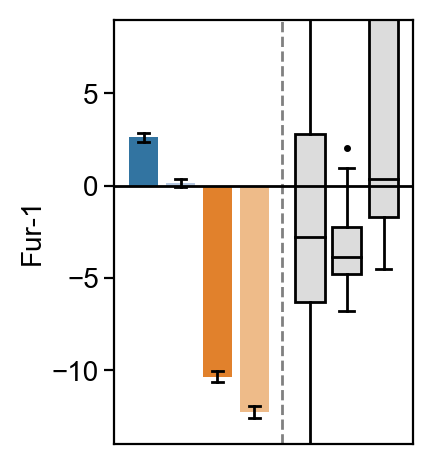

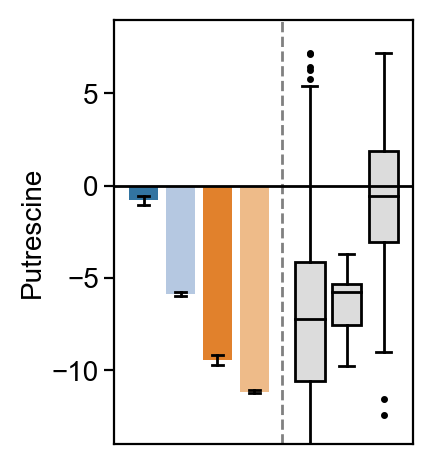

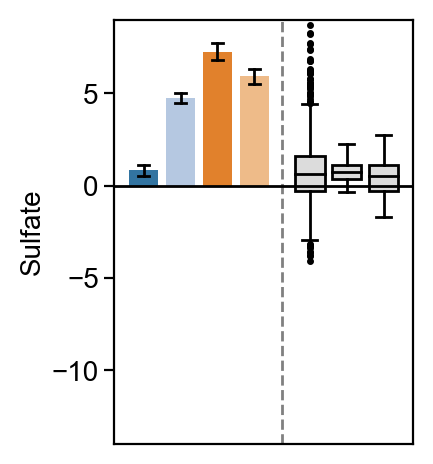

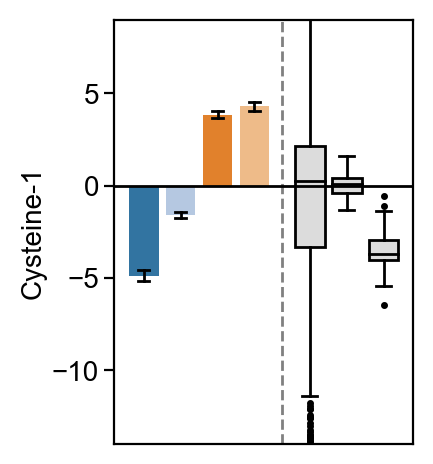

In [818]:
plt.rcParams['font.size'] = 10
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

for iM in iMs:
    iM = iM

    fig, ax = plt.subplots(dpi=200)

    sns.barplot(
        data=df1,
        x="condition",
        y=iM,
        order=["DDB35_control", "DDB35_scale-down", "HMP3071_control", "HMP3071_scale-down"],
        palette="tab20",
        errorbar="sd",
        ax=ax,
        errcolor="k",
        errwidth=1,
        capsize=0.3
    )

    # kws = {"s": 1.5, "facecolor": "none", "linewidth": 0.3}

    # sns.scatterplot(
    #     data=df1,
    #     x="condition",
    #     y=iM,
    #     edgecolor="k",
    #     markers=["o"],
    #     **kws,
    #     ax=ax
    # )

    df2.boxplot(
        ax=ax, 
        column=iM, 
        positions=[4.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=1,facecolor="gainsboro"),
        capprops=dict(linewidth=1,color="k"),
        whiskerprops=dict(linewidth=1,color="k"),
        medianprops=dict(linewidth=1,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=3),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[5.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=1,facecolor="gainsboro"),
        capprops=dict(linewidth=1,color="k"),
        whiskerprops=dict(linewidth=1,color="k"),
        medianprops=dict(linewidth=1,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=3),
        patch_artist=True,
        color="k"
    )

    df2.loc[ddb_fed_batch_samples].boxplot(
        ax=ax, 
        column=iM, 
        positions=[6.5],
        grid=False, 
        widths=0.8,
        boxprops=dict(color="k",linewidth=1,facecolor="gainsboro"),
        capprops=dict(linewidth=1,color="k"),
        whiskerprops=dict(linewidth=1,color="k"),
        medianprops=dict(linewidth=1,color="k"),
        flierprops=dict(markerfacecolor="k",markeredgecolor=None,marker=".",markersize=3),
        patch_artist=True,
        color="k"
    )

    ax.set_xlim(-0.8, 7.3)
    ax.set_ylim(-14, 9)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.vlines(x=3.75,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],colors="grey",linestyles="--", linewidths=1)
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],colors="k",linestyles="-", linewidths=1)

    ax.set_xticks([])
    ax.set_xlabel("")

    # ax.get_legend().remove()
    w=28/40*70/25.4
    h=70/25.4
    fig.set_size_inches(w=w,h=h)
    plt.savefig("Chapter_figures/"+iM.replace("/","-")+".svg", dpi=900)

# LogTPM values of pyruvate-formate-lyase

In [83]:
genes = [
    "grcA",
    "pflA",
    "pflB",
    "pflC",
    "tdcE",
    "ybiW",
    "ybiY"
]

In [85]:
gene_ids = []

for gene in genes:
    gene_ids.append(ica_data.name2num(gene))

In [91]:
log_tpm = pd.read_csv("../data/RNAseq_data/log_tpm.csv", index_col=0)
log_tpm = log_tpm.loc[gene_ids].T
log_tpm.columns = genes
log_tpm

,grcA,pflA,pflB,pflC,tdcE,ybiW,ybiY
PD_117_R10_S05#,9.734824,6.828782,10.658422,2.301529,2.257373,2.539371,0.881673
PD_117_R11_S05#,11.002504,7.530277,10.536545,2.163676,2.614475,2.709443,0.510878
PD_117_R12_S05#,10.821844,7.560233,10.407316,2.658170,2.446469,2.704393,0.721194
PD_117_R13_S05#,10.566528,7.451830,10.519589,2.799823,2.692756,2.387391,0.789145
PD_117_R14_S05#,12.220707,8.058655,10.645242,2.774293,2.339217,2.528055,0.397201
PD_117_R15_S05#,12.307872,8.069466,10.804101,2.476463,2.419816,2.496013,0.787306
PD_117_R16_S05#,12.363714,8.112444,10.753036,2.690591,2.493108,2.627352,0.606347
PD_117_R5_S05#1,8.612710,6.426593,10.624377,2.587690,2.114952,2.523142,0.719344
PD_117_R6_S05#1,8.620152,6.465047,10.696188,2.488947,2.110284,2.438887,0.795499
PD_117_R7_S05#1,8.630104,6.385841,10.671001,2.554044,2.185753,2.544141,0.879579


In [95]:
sample_table = trp_ica_data.sample_table[["strain_ID","process_condition","condition"]]
log_tpm = pd.concat([log_tpm, sample_table], axis=1)
log_tpm = log_tpm.sort_values("condition")

In [96]:
log_tpm

,grcA,pflA,pflB,pflC,tdcE,ybiW,ybiY,strain_ID,process_condition,condition
PD_117_R5_S05#1,8.612710,6.426593,10.624377,2.587690,2.114952,2.523142,0.719344,DDB35,control,DDB35_control
PD_117_R6_S05#1,8.620152,6.465047,10.696188,2.488947,2.110284,2.438887,0.795499,DDB35,control,DDB35_control
PD_117_R7_S05#1,8.630104,6.385841,10.671001,2.554044,2.185753,2.544141,0.879579,DDB35,control,DDB35_control
PD_117_R10_S05#,9.734824,6.828782,10.658422,2.301529,2.257373,2.539371,0.881673,DDB35,scale-down,DDB35_scale-down
PD_117_R8_S05#1,9.778556,6.654041,10.572835,2.329404,2.307126,2.700168,0.897729,DDB35,scale-down,DDB35_scale-down
PD_117_R9_S05#1,9.631390,6.769140,10.634334,2.426368,2.328240,2.656334,0.560529,DDB35,scale-down,DDB35_scale-down
PD_117_R11_S05#,11.002504,7.530277,10.536545,2.163676,2.614475,2.709443,0.510878,HMP3071,control,HMP3071_control
PD_117_R12_S05#,10.821844,7.560233,10.407316,2.658170,2.446469,2.704393,0.721194,HMP3071,control,HMP3071_control
PD_117_R13_S05#,10.566528,7.451830,10.519589,2.799823,2.692756,2.387391,0.789145,HMP3071,control,HMP3071_control
PD_117_R14_S05#,12.220707,8.058655,10.645242,2.774293,2.339217,2.528055,0.397201,HMP3071,scale-down,HMP3071_scale-down


In [98]:
gene_ids[:2]

['b2579', 'b0902']

In [99]:
genes[:2]

['grcA', 'pflA']